In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set1")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

In [ ]:
# Dataset 

## Información general
eNTERFACE05 | eNTERFACE05
--- | --- 
Idioma | English
Muestras | 1287
Emociones | anger disgust fear happiness sadness surprise
Nº de actores | 43 (34H 9M) (from 14 different nationalities)
Naturaleza | Simulada
URLs | [Documentación](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.220.2113&rep=rep1&type=pdf)


**Archivos**

carcterística | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps



## Selección de muestras
Emociones de estudio
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargando el objeto del dataset

In [3]:
dataset = "enterface-01234"
dataset_path = "~/PycharmProjects/tfm-project/data/" + dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_instances = len(ds.targets)

Loading data from enterface-01234 data set...


**Número de instancias**

In [4]:
print("Number of instances: " + str(number_instances))

Number of samples: 1072


**Distribución de duración** de los audios

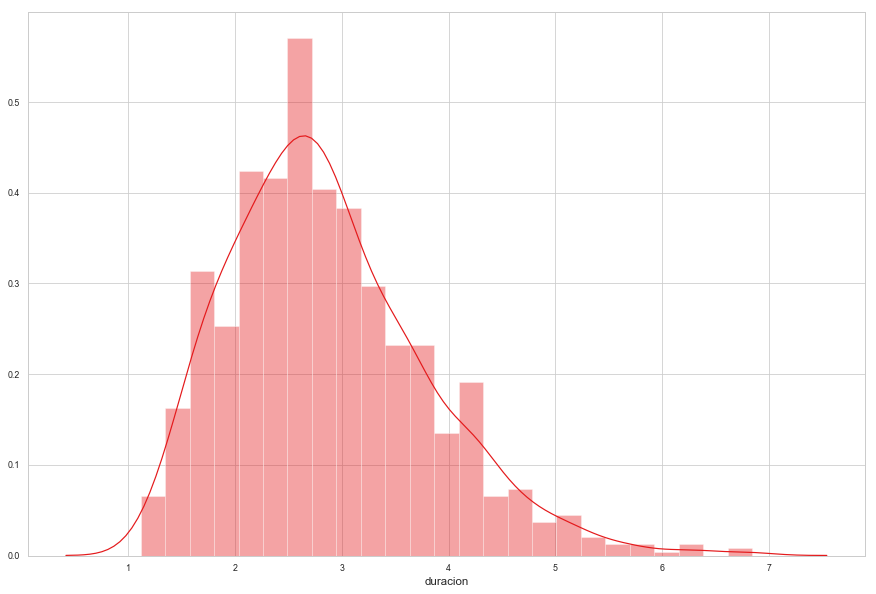

In [7]:
duracion = []
for i in range(0, number_instances):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [8]:
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: ds.dictionary[i])
df_emotions.value_counts()

sadness      215
fear         215
disgust      215
anger        215
happiness    212
Name: emotion, dtype: int64

**Distribución de duración según la emoción**

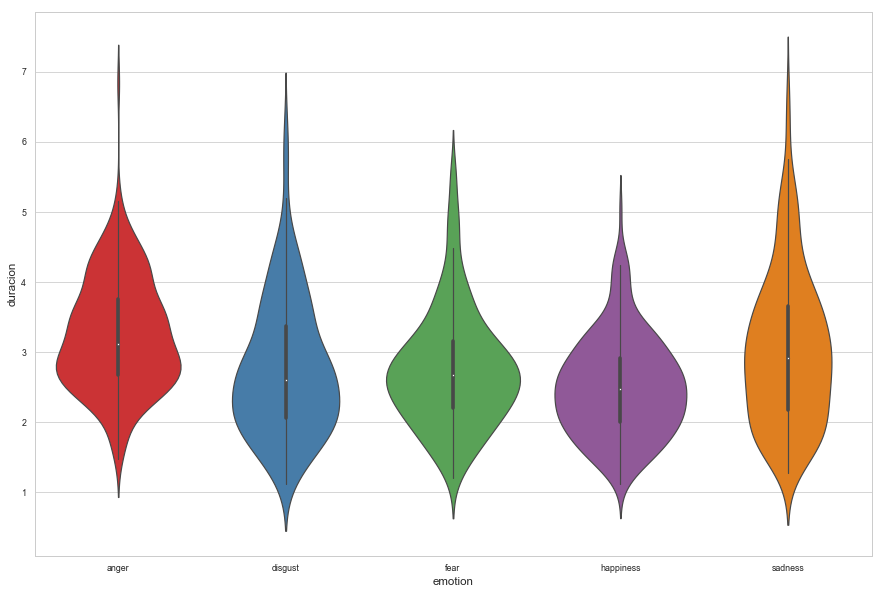

In [9]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

## Selección de la longitud de ventana de muestreo

In [10]:

df_compare_frame_size = pd.read_csv('data/compare_frame_size_csv/' + dataset +
                                    '.csv')
df_compare_frame_size.head()

zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0 -0.087833 -0.096512        0.060595          -0.083260        -0.085574   
1 -0.057328 -0.073118        0.122287          -0.052658        -0.058378   
2 -0.072297 -0.085061        0.091283          -0.067571        -0.071871   
3 -0.061066 -0.075464        0.114019          -0.056461        -0.061766   
4 -0.072723 -0.084849        0.095138          -0.067334        -0.070801   

   spectral_entropy  spectral_flux  spectral_rolloff    mfcc_1    mfcc_2  ...  \
0         -0.024426      -0.096986         -0.080972 -1.773862 -0.213034  ...   
1          0.031058      -0.073541         -0.046336 -2.163288 -0.224399  ...   
2          0.001234      -0.085546         -0.063351 -1.978204 -0.211385  ...   
3          0.022548      -0.075985         -0.051563 -2.093373 -0.226573  ...   
4         -0.000438      -0.085113         -0.063543 -2.051254 -0.205423  ...   

   chroma_8  chroma_9  chroma_10  chroma_11  chroma_12  chroma_std  \
0 -0.096294 -0.097242  -0.096990  -0.095745  -0.097285   -0.096257   
1 -0.072885 -0.073776  -0.073525  -0.072153  -0.073835   -0.072807   
2 -0.084880 -0.085840  -0.085634  -0.083982  -0.085861   -0.084719   
3 -0.075374 -0.076244  -0.075928  -0.074715  -0.076257   -0.075240   
4 -0.084491 -0.085454  -0.085250  -0.083363  -0.085487   -0.084179   

   harmonic_ratio     pitch  frame_size    emotion  
0       -0.082256  5.108103       0.015      anger  
1       -0.060328  4.673629       0.015    disgust  
2       -0.071001  4.886987       0.015       fear  
3       -0.063140  4.703617       0.015  happiness  
4       -0.069845  4.931644       0.015    sadness  

[5 rows x 38 columns]

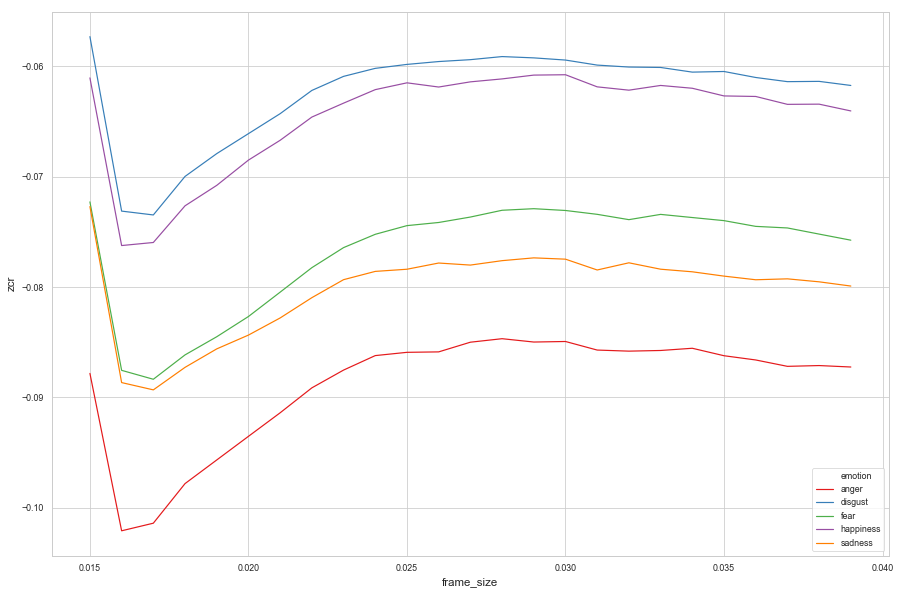

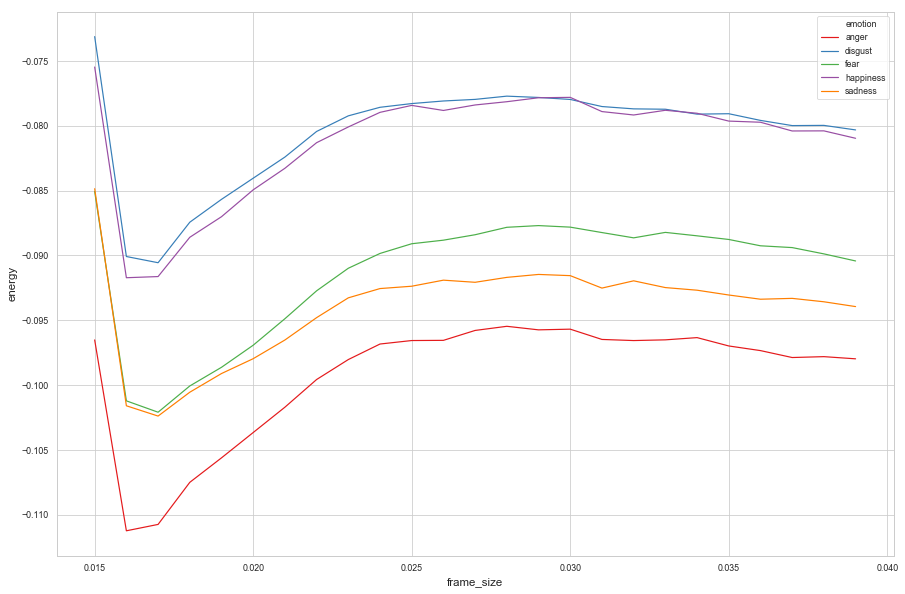

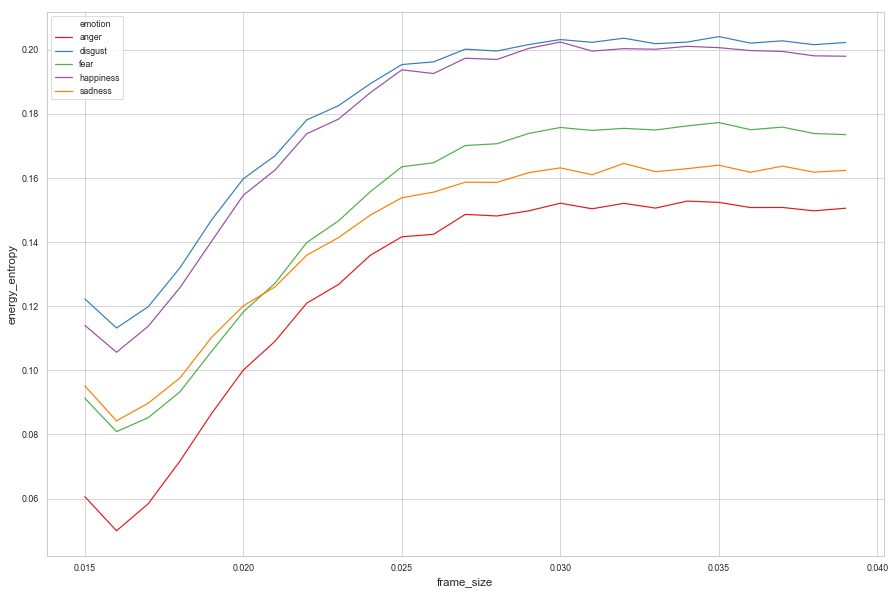

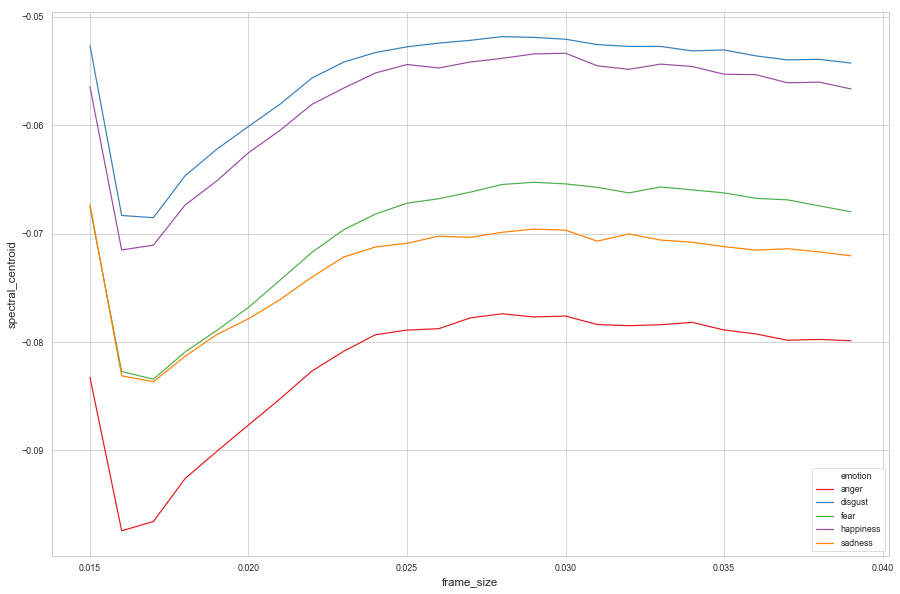

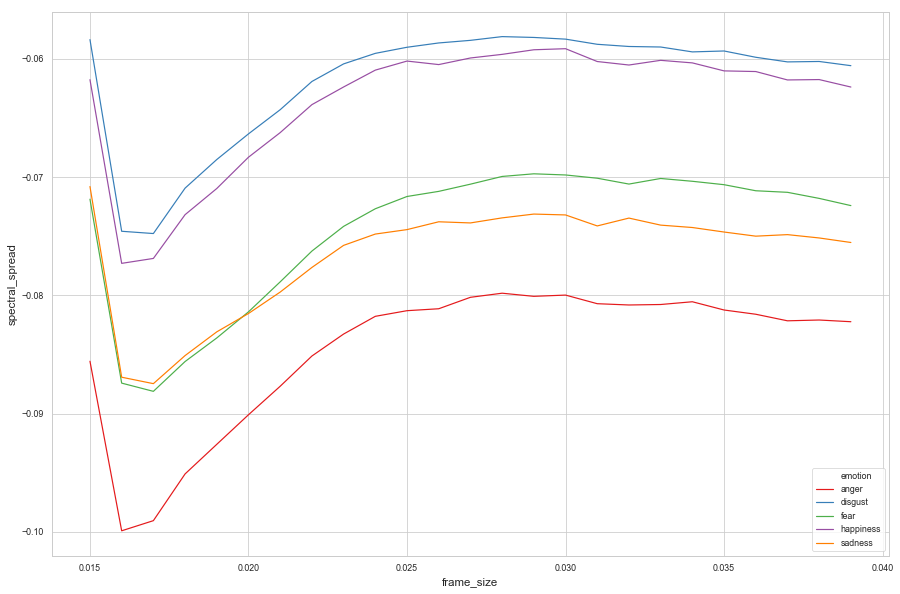

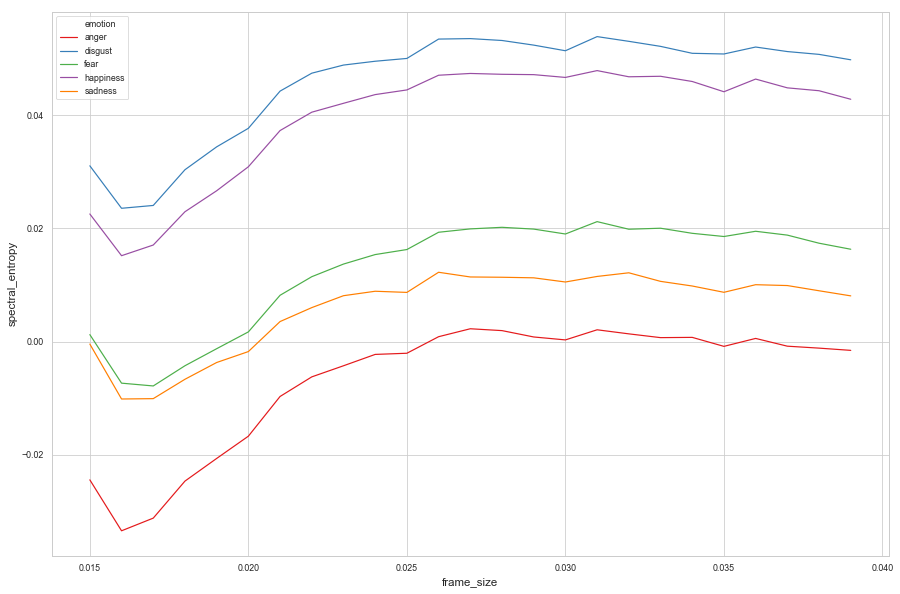

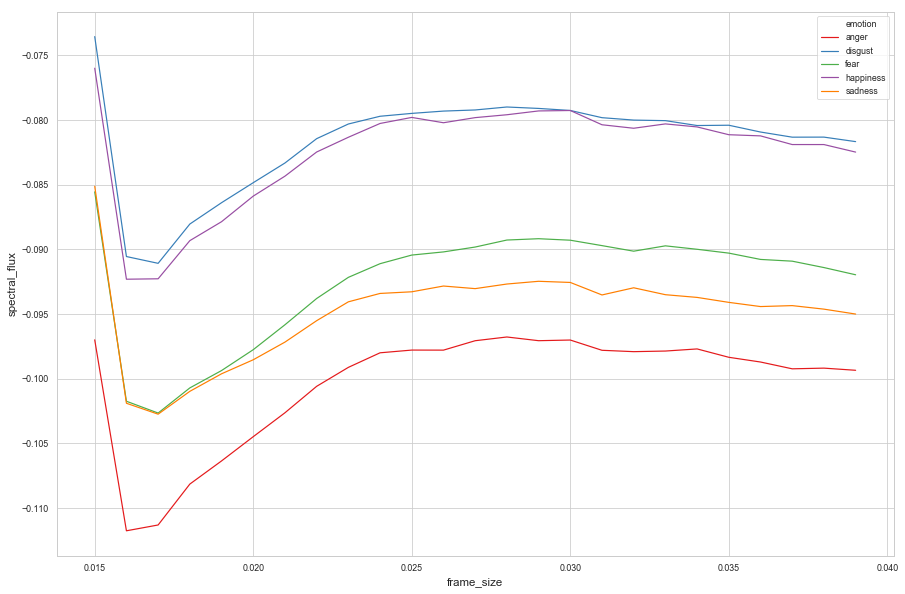

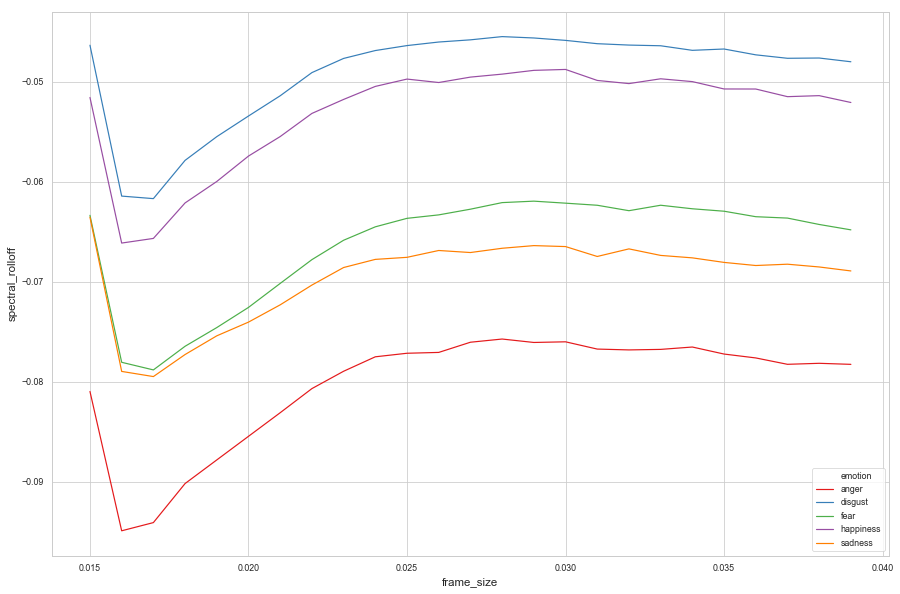

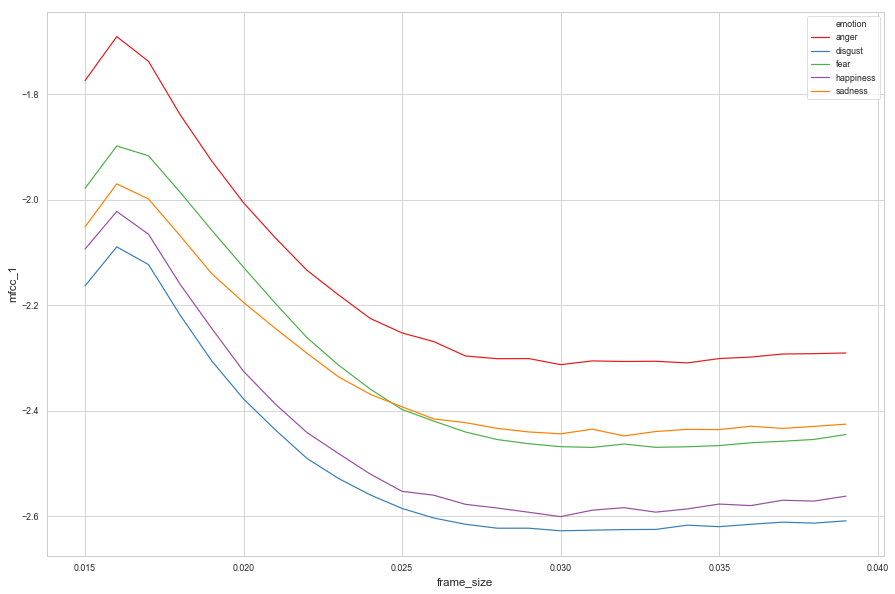

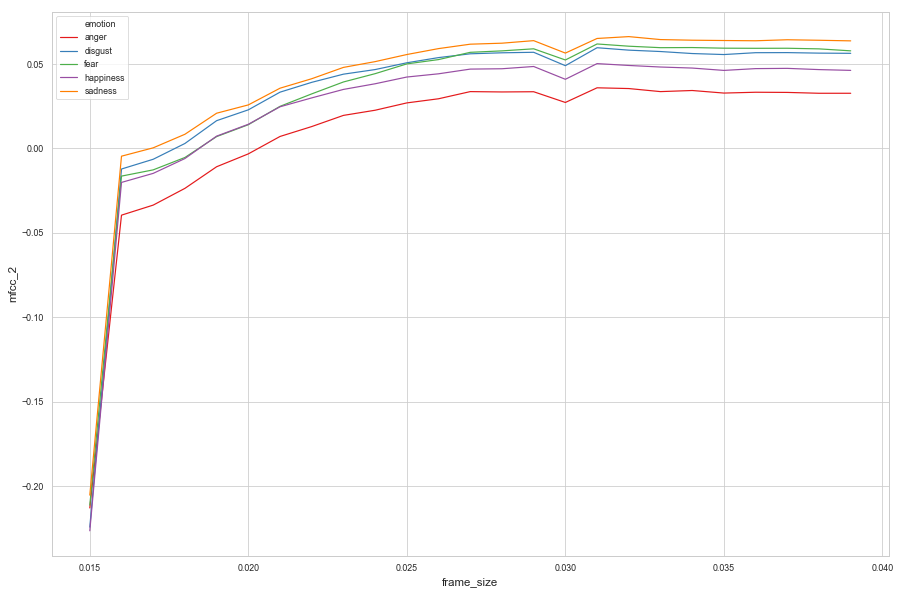

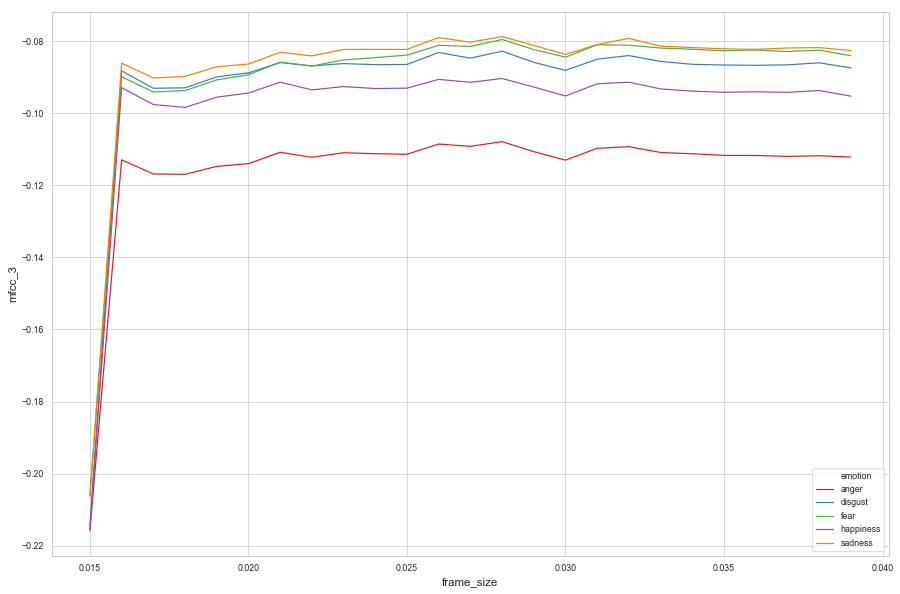

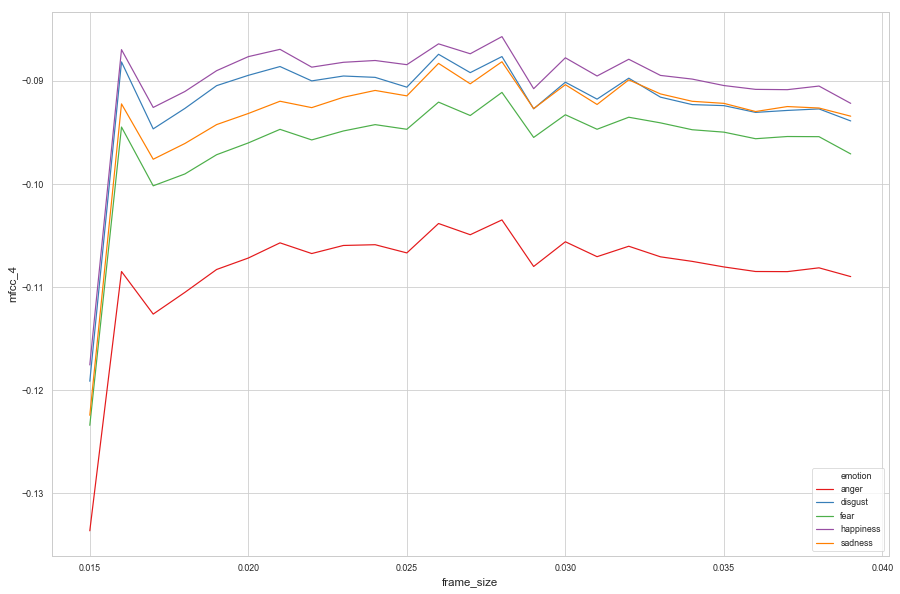

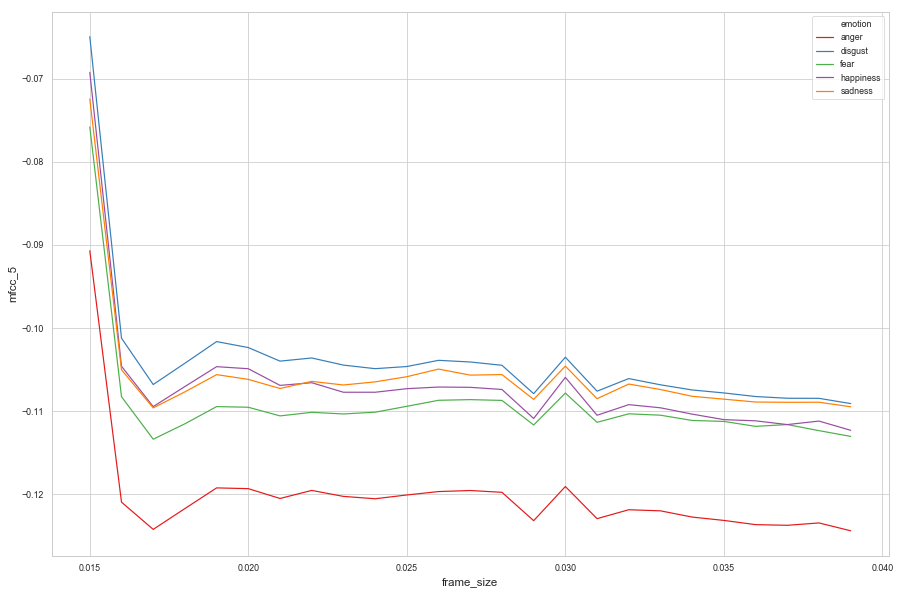

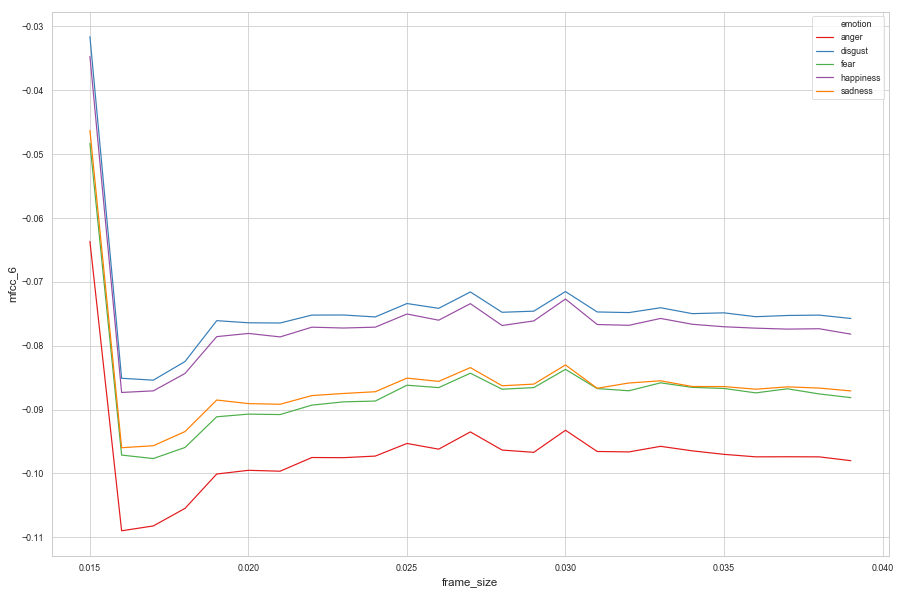

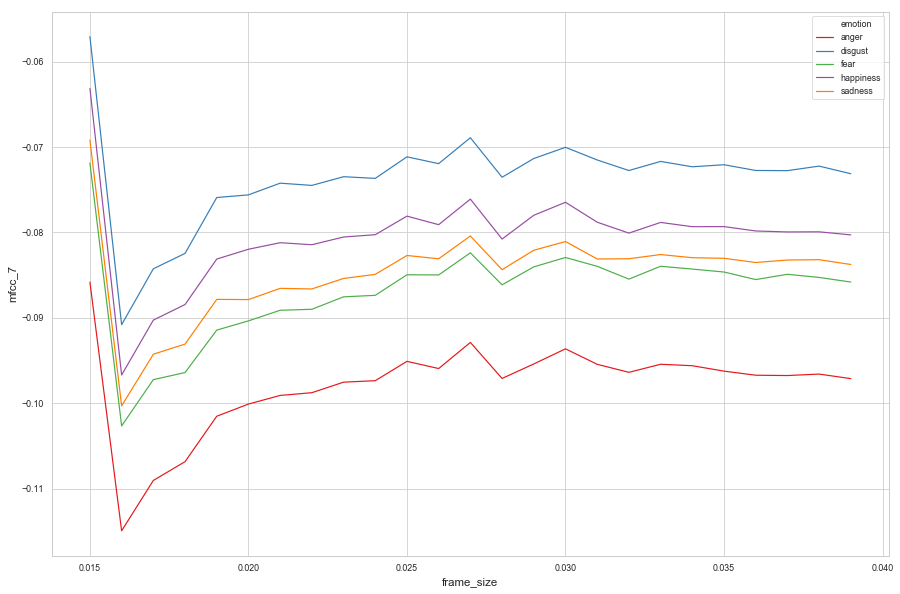

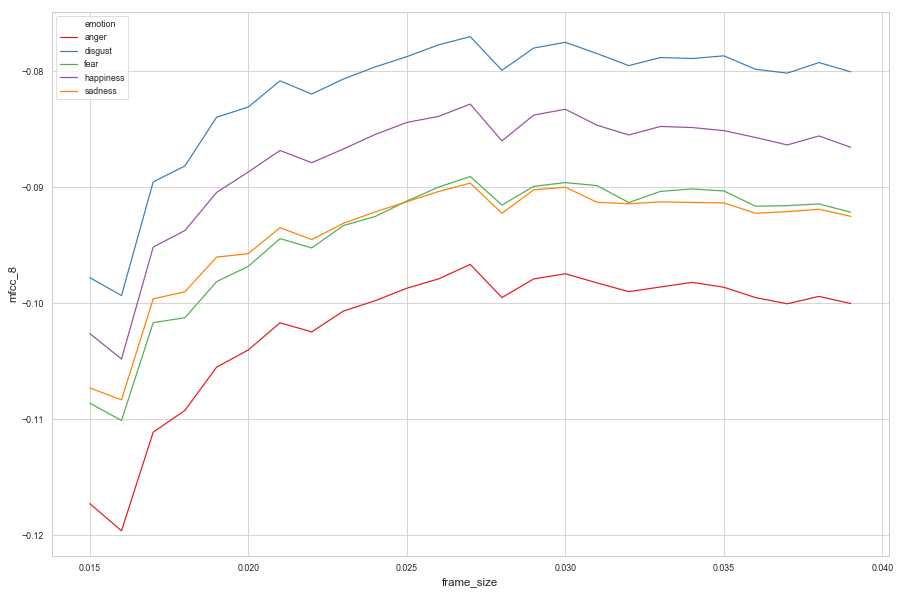

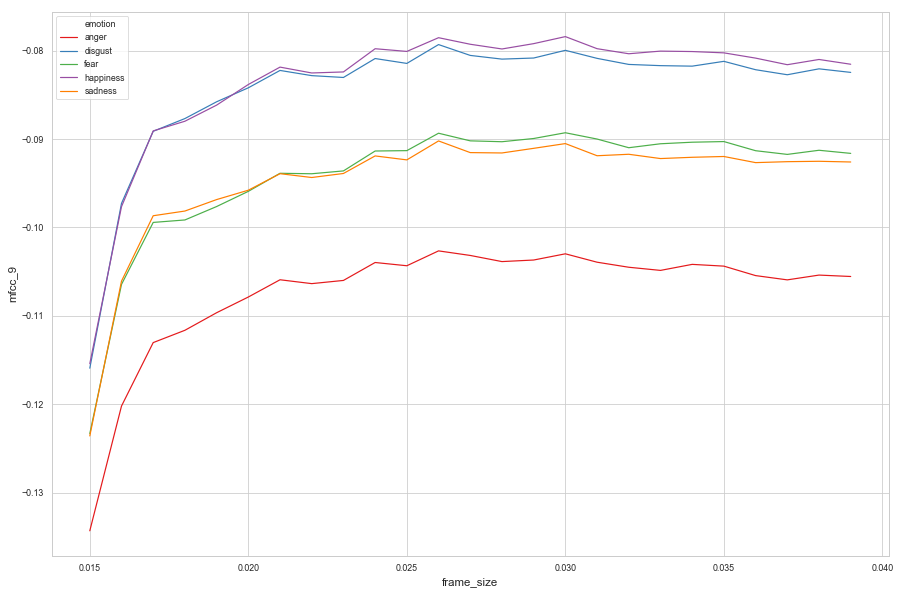

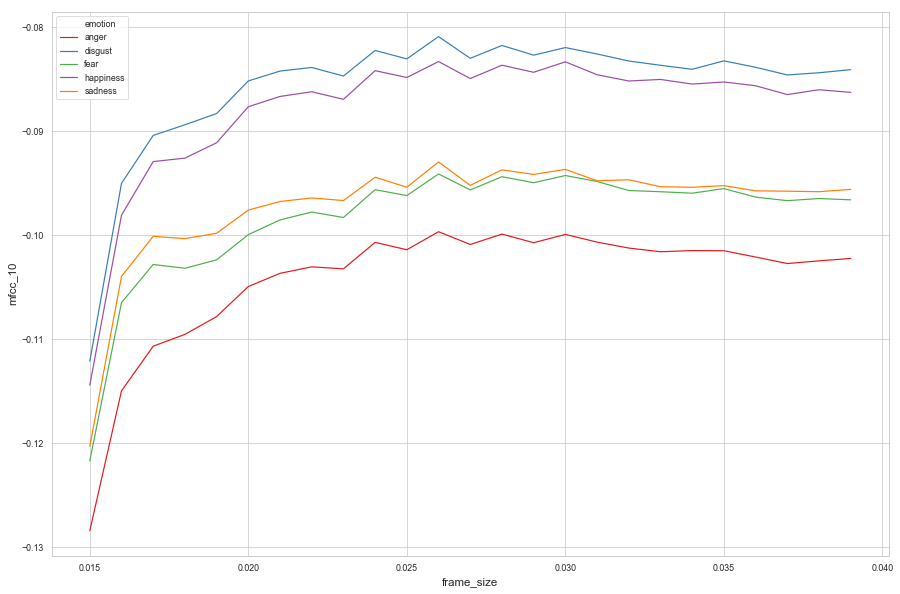

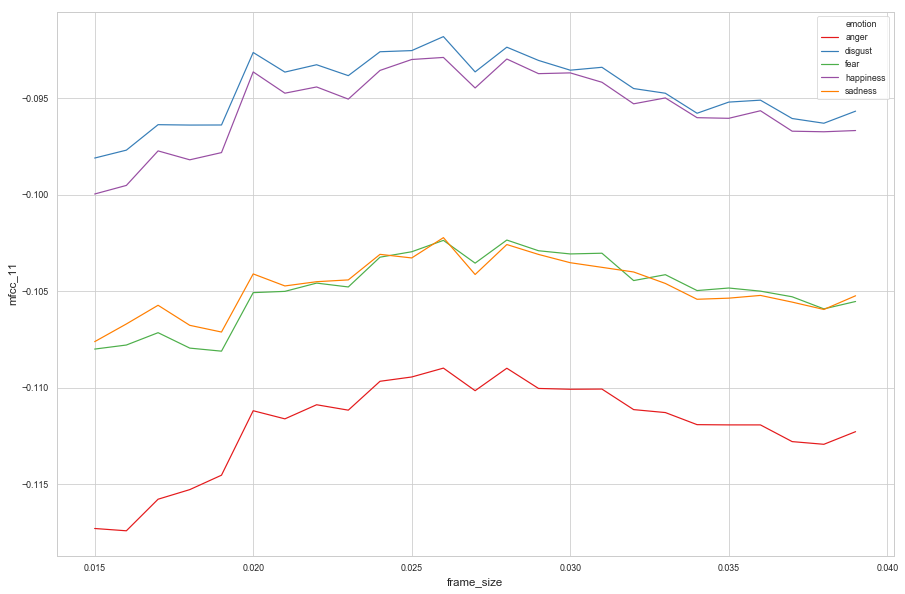

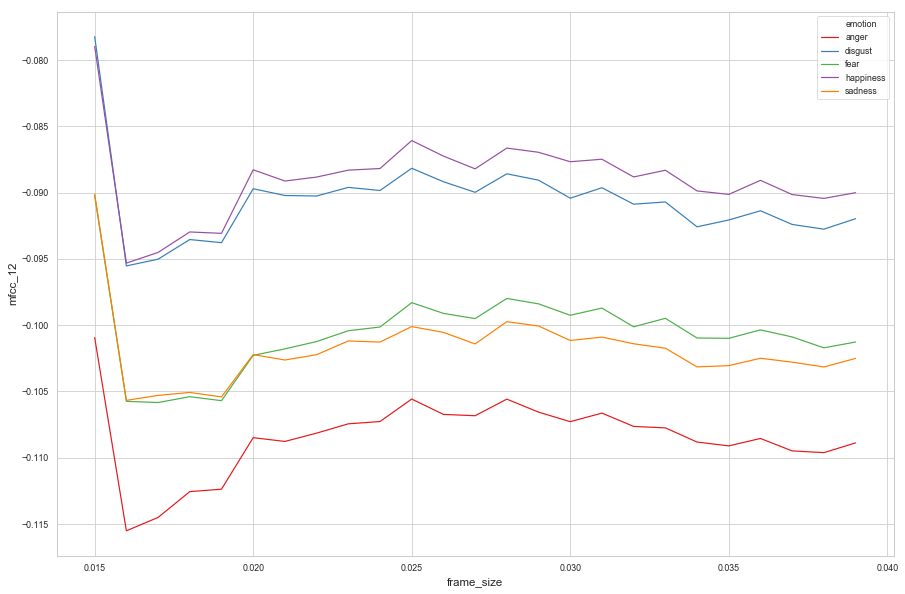

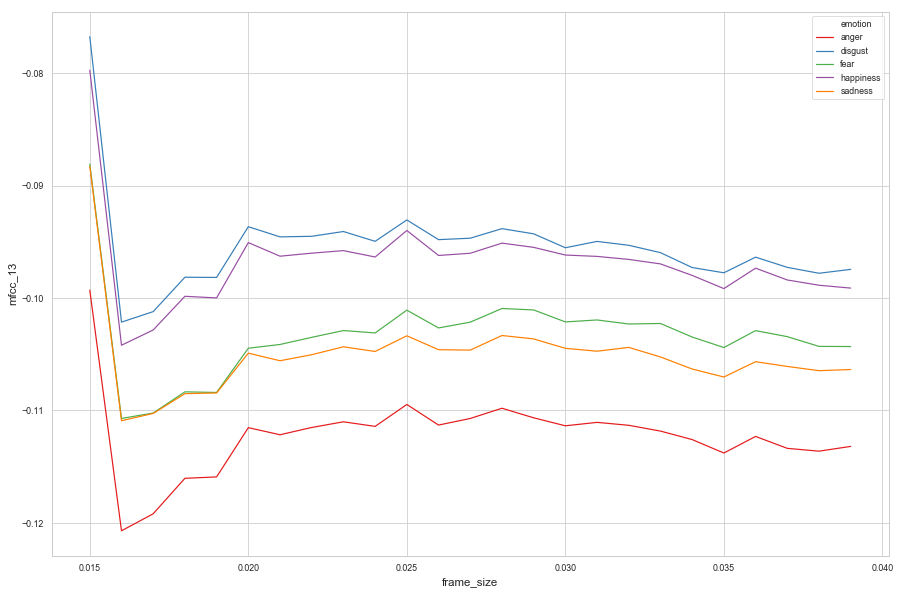

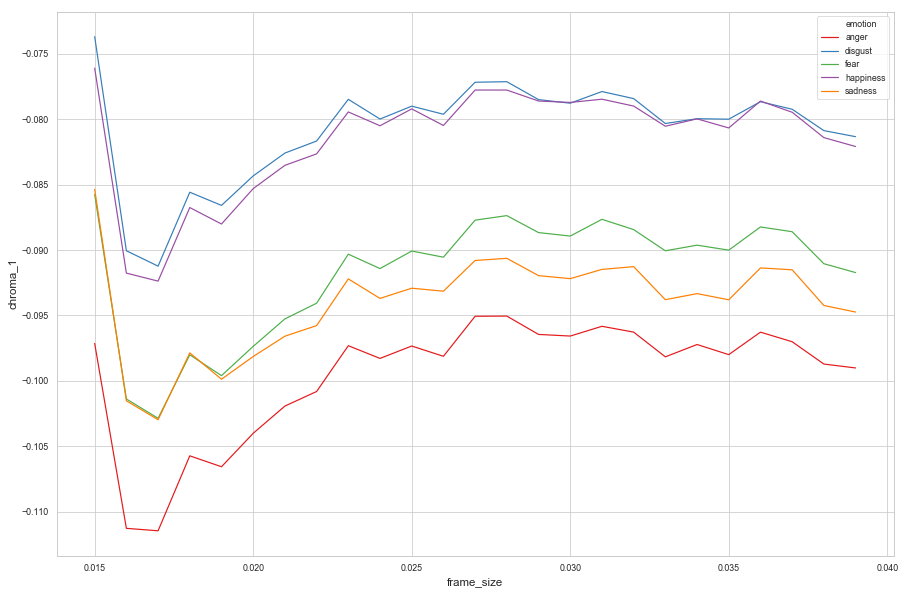

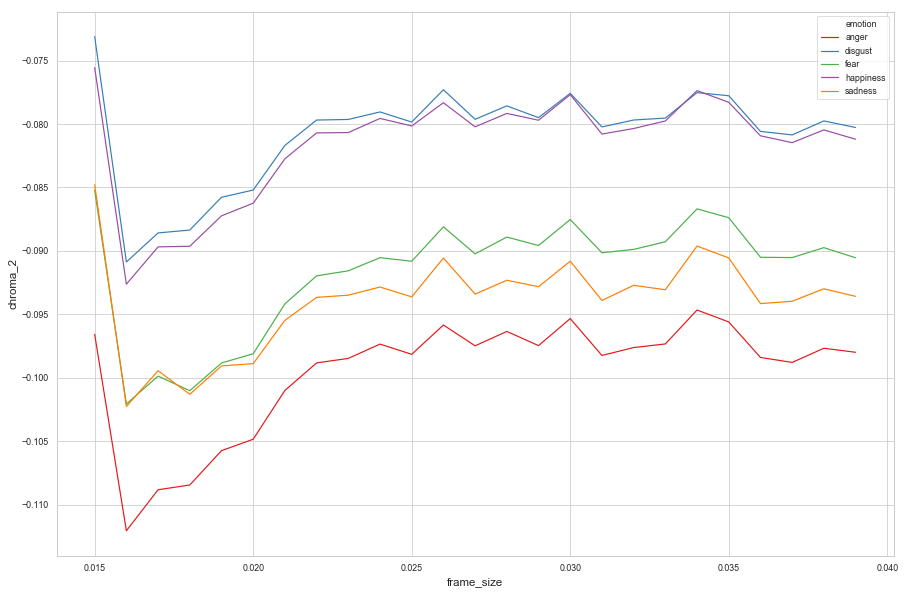

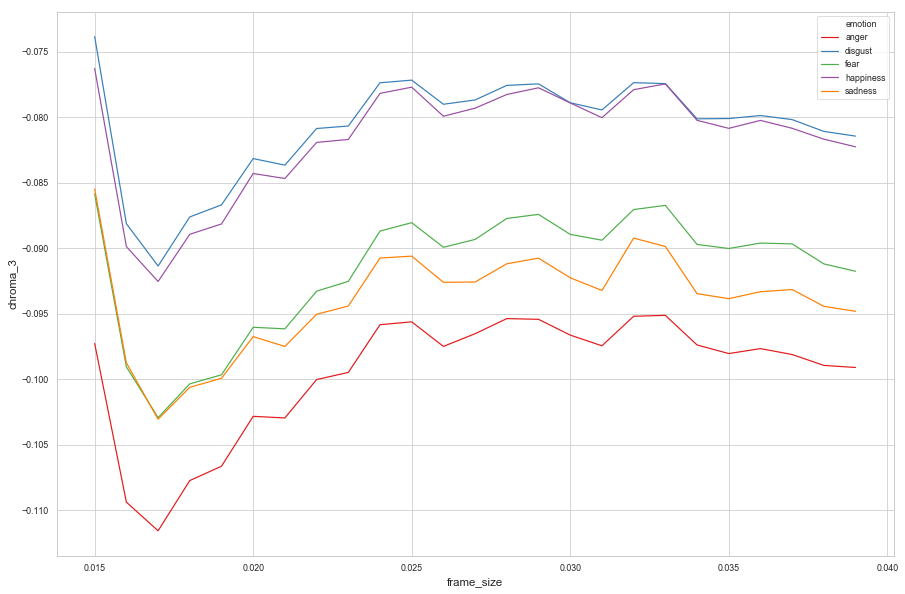

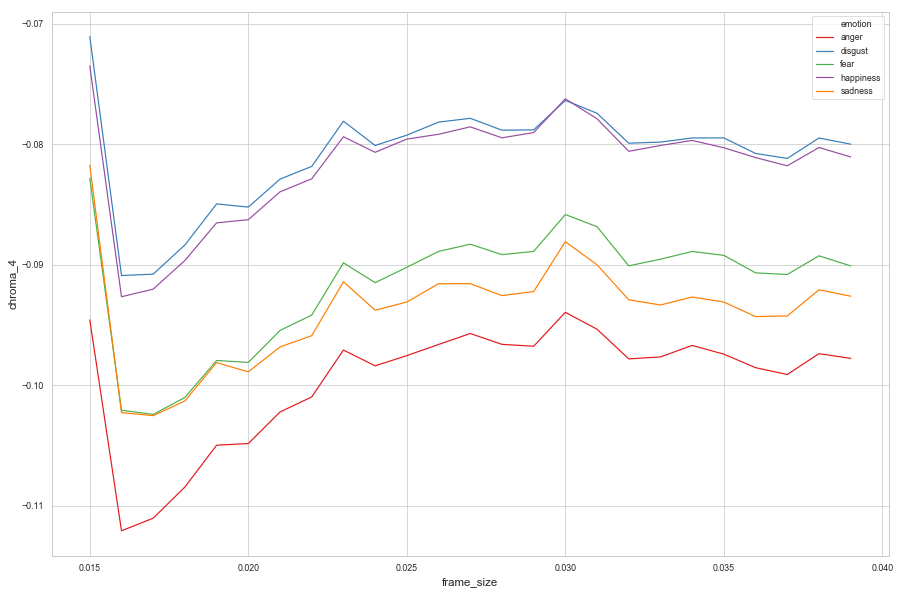

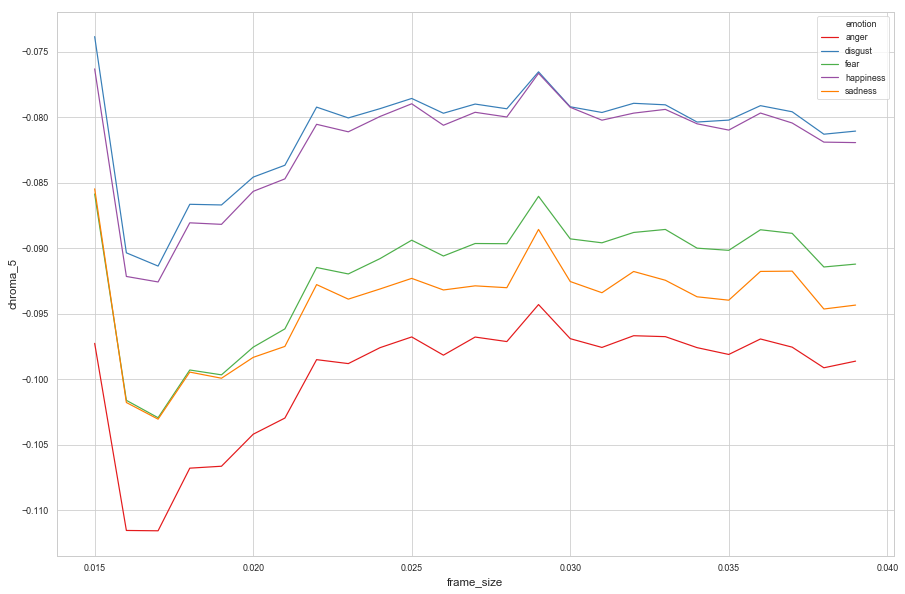

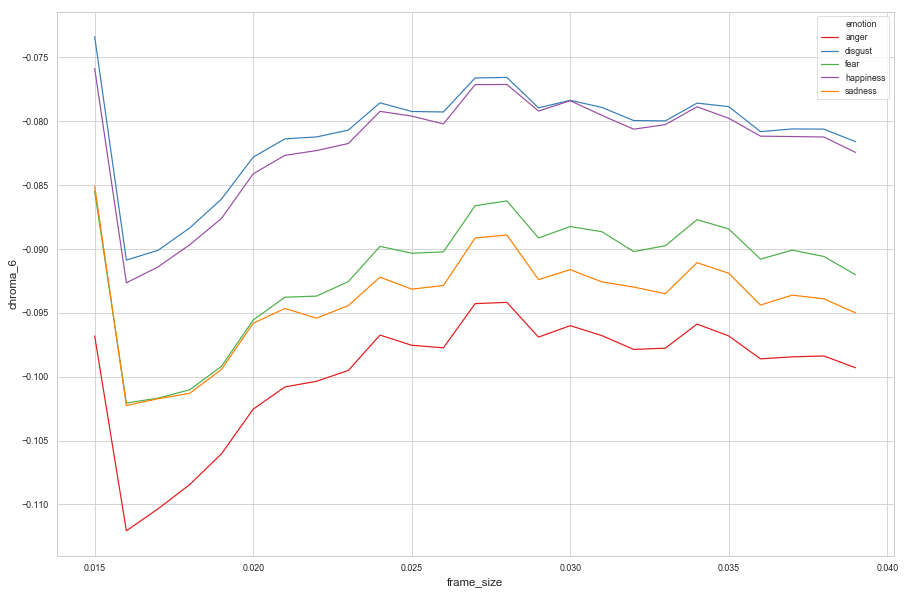

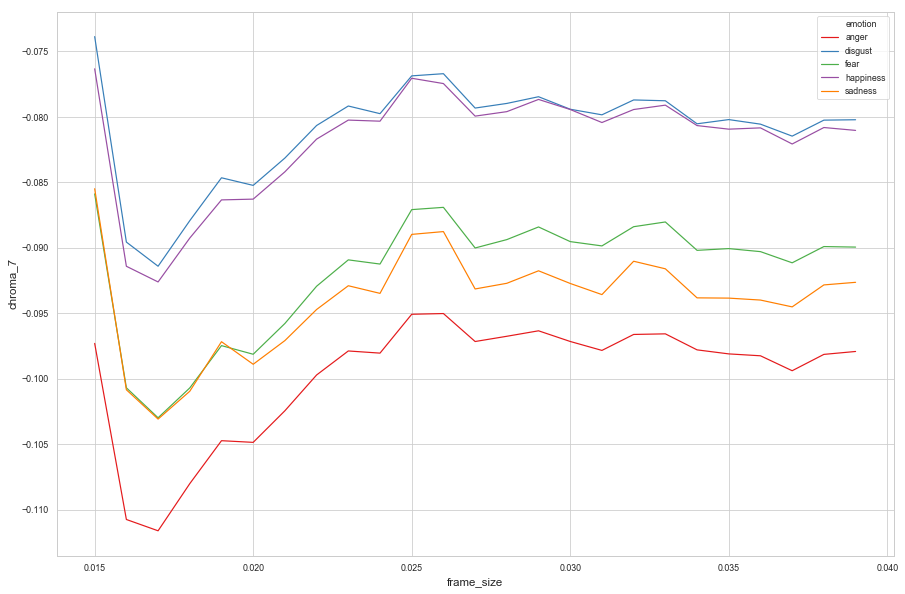

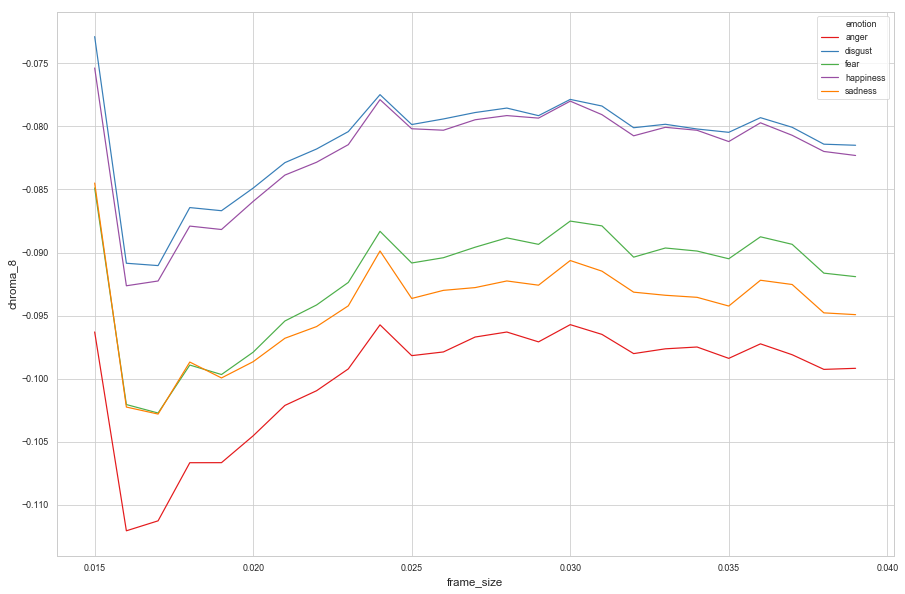

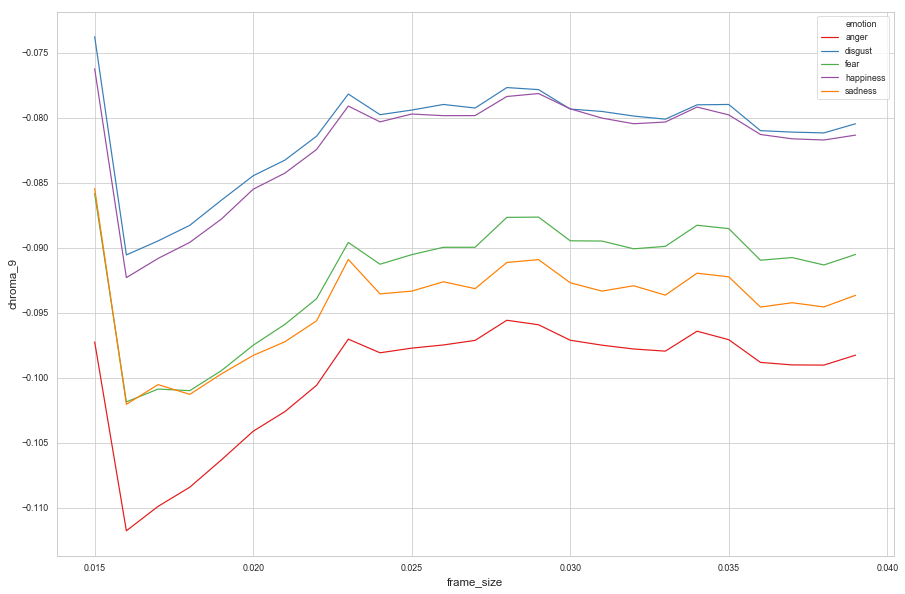

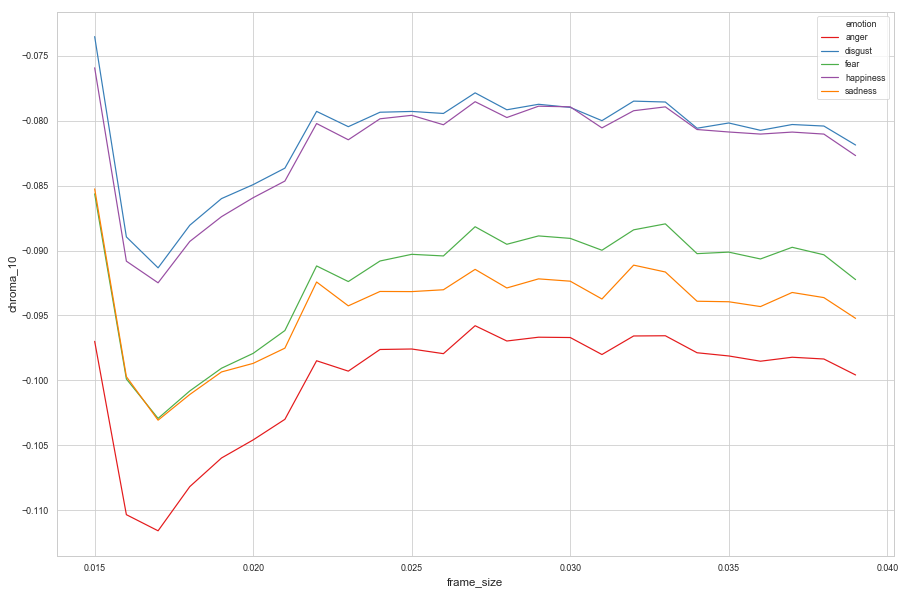

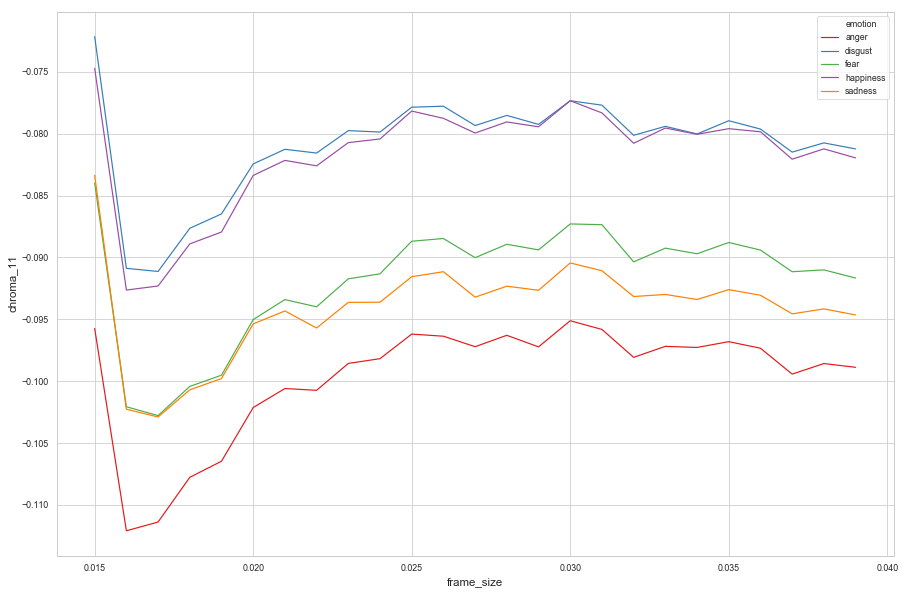

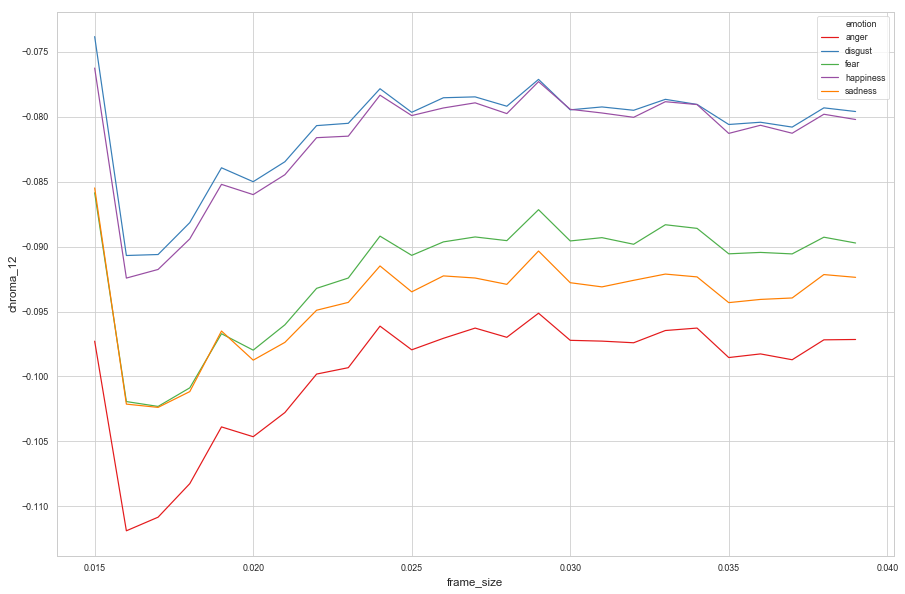

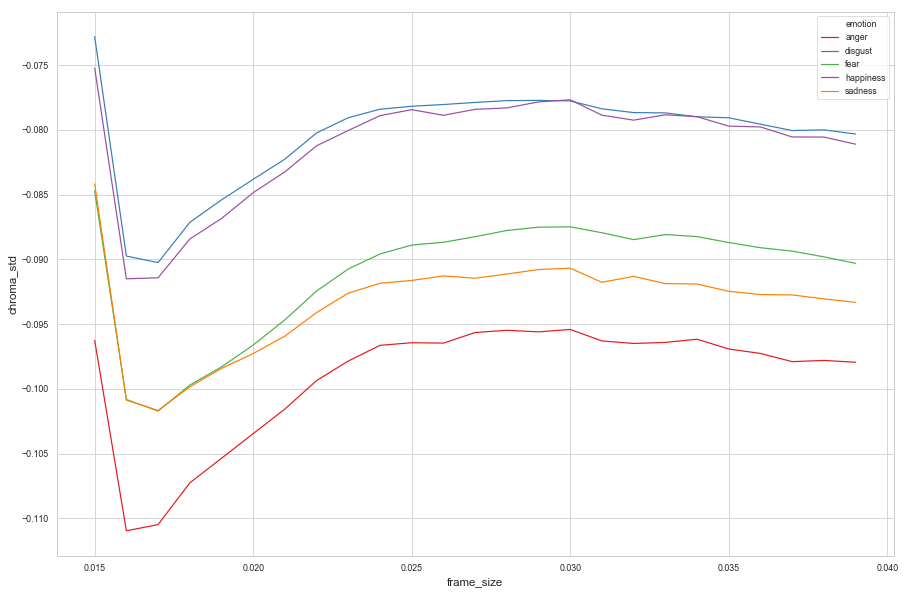

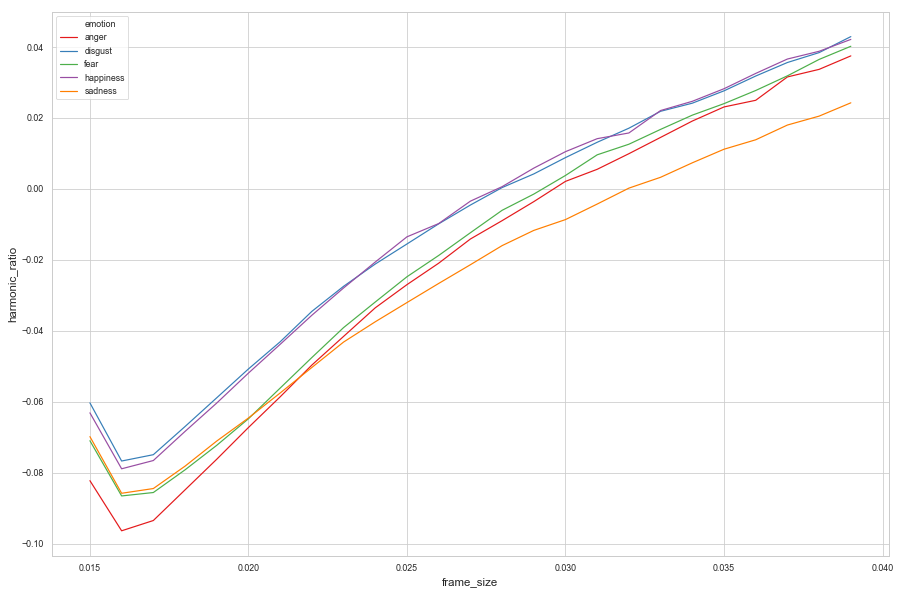

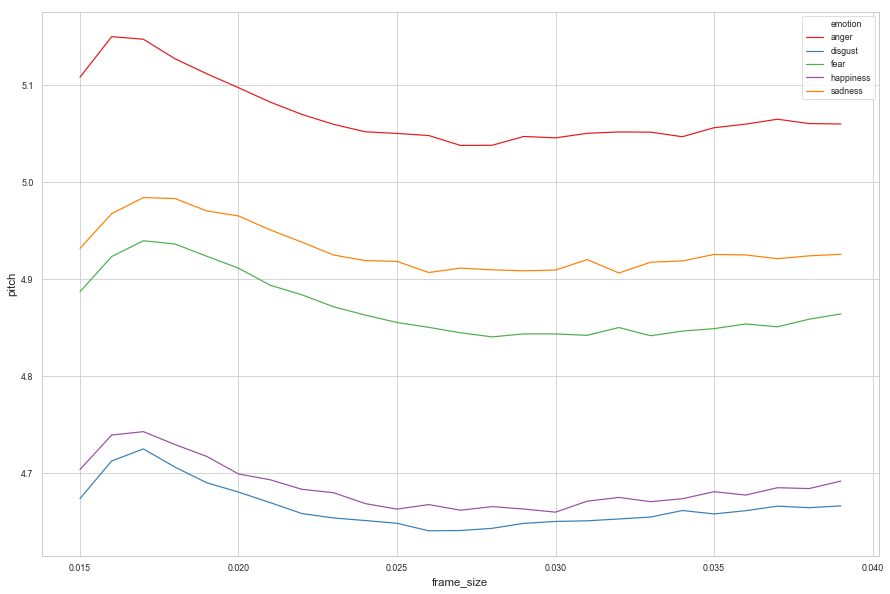

In [11]:
for column in df_compare_frame_size.drop(["frame_size","emotion"],axis=1):
    sns.lineplot(x="frame_size", y=column, hue="emotion", data=df_compare_frame_size)
    plt.show()
    

# Características

Cargando el array tridimensional de características

In [1]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

Loading features from file...



NameError: name 'pickle' is not defined

Creando un **dataframe con MultiIndex** a partir del objeto tridimensional

In [13]:
df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])
df.head()

zcr    energy  energy_entropy  spectral_centroid  \
audio_number row                                                          
0            0   -0.094486 -0.104203        0.046646          -0.089828   
             1   -0.105729 -0.111783        0.018188          -0.099776   
             2    0.191925  0.158092        0.673380           0.207975   
             3   -0.099986 -0.111460        0.044851          -0.096843   
             4   -0.098963 -0.110849        0.036190          -0.095712   

                  spectral_spread  spectral_entropy  spectral_flux  \
audio_number row                                                     
0            0          -0.088633         -0.050408      -0.104205   
             1          -0.098454         -0.072130      -0.111440   
             2           0.203397          0.429024       0.162171   
             3          -0.097183         -0.037214      -0.111172   
             4          -0.096536         -0.038038      -0.110570   

                  spectral_rolloff    mfcc_1    mfcc_2  ...  chroma_6  \
audio_number row                                        ...             
0            0           -0.096370 -2.145774 -0.167488  ... -0.103853   
             1           -0.106558 -1.912248 -0.157751  ... -0.111748   
             2            0.275344 -5.865432 -0.044084  ...  0.162521   
             3           -0.075312 -1.970759 -0.161918  ... -0.109844   
             4           -0.085099 -1.976879 -0.162414  ... -0.108977   

                  chroma_7  chroma_8  chroma_9  chroma_10  chroma_11  \
audio_number row                                                       
0            0   -0.104133 -0.103773 -0.104182  -0.104165  -0.100538   
             1   -0.111727 -0.111624 -0.111748  -0.111614  -0.107222   
             2    0.158291  0.161775  0.158471   0.158860   0.161024   
             3   -0.111387 -0.110798 -0.111434  -0.111368  -0.109789   
             4   -0.110769 -0.109255 -0.110659  -0.110595  -0.108539   

                  chroma_12  chroma_std  harmonic_ratio     pitch  
audio_number row                                                   
0            0    -0.104195   -0.102447       -0.071775  5.567972  
             1    -0.111759   -0.110272       -0.103604  5.647943  
             2     0.158294    0.161627        0.158091  0.158091  
             3    -0.111345   -0.110393       -0.092669  5.627831  
             4    -0.110782   -0.109991       -0.094308  5.626158  

[5 rows x 36 columns]

Función para la representación de los boxplot de cada caraterística

In [14]:
def display_boxplot(feature, df, df_emotions):
    df_features_mean = pd.DataFrame(columns=label_features)
    for i in range(0, df_emotions.size):
        df_features_mean = df_features_mean.append(df.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions, df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)
    plt.show()

## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


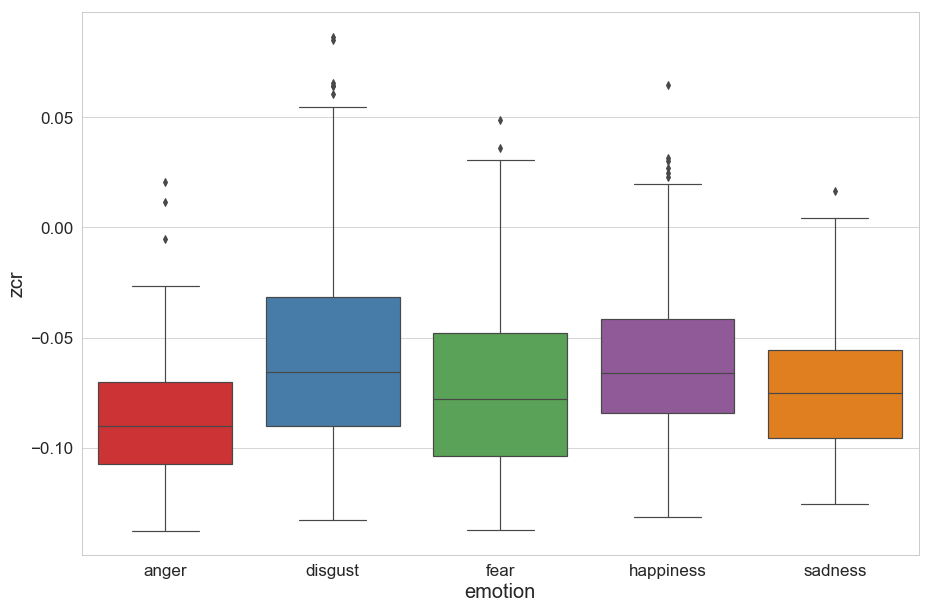

In [15]:
display_boxplot("zcr", df, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

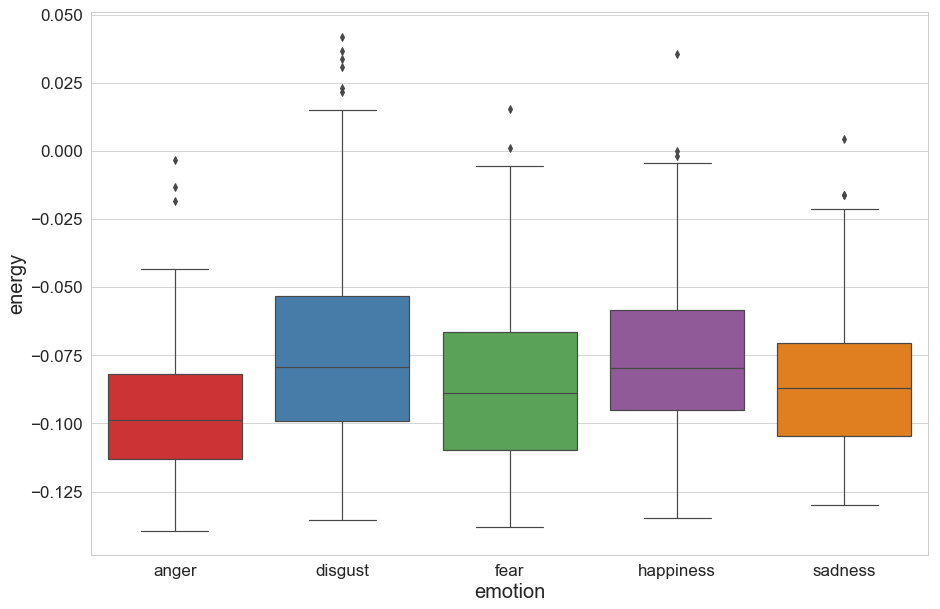

In [16]:
display_boxplot("energy", df, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

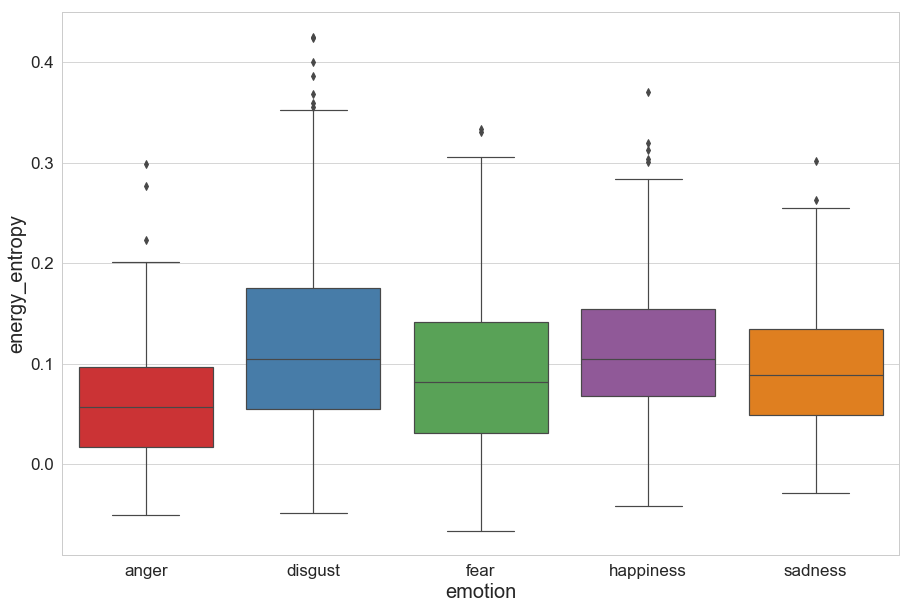

In [17]:
display_boxplot("energy_entropy", df, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

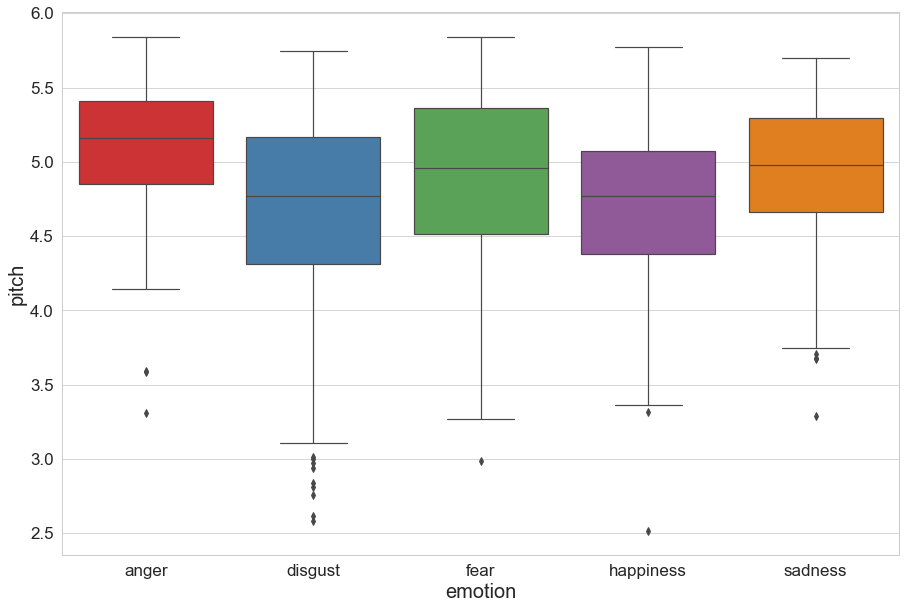

In [18]:
display_boxplot("pitch", df, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energía en la porción armónica del frame respecto a la total.

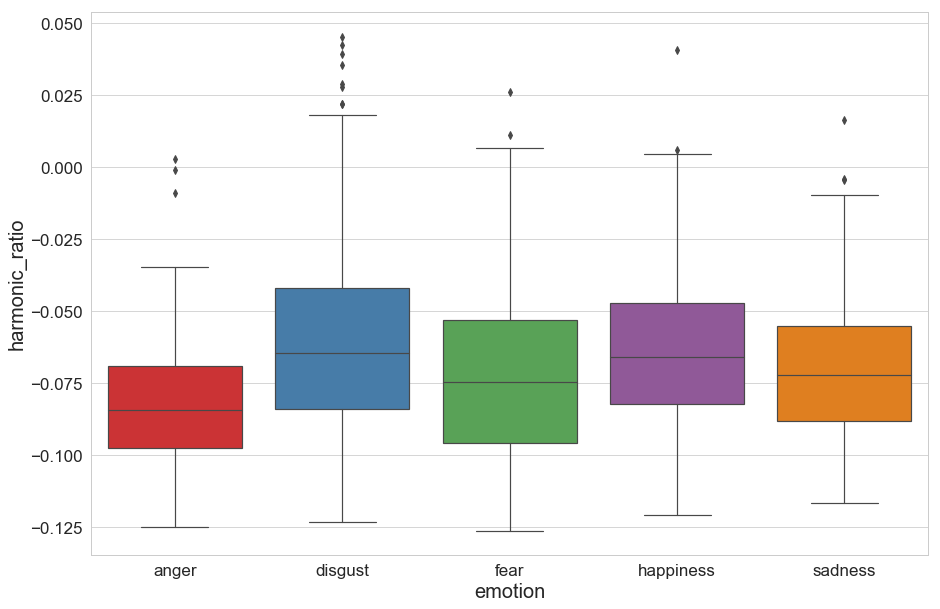

In [19]:
display_boxplot("harmonic_ratio", df, df_emotions)

# Spectral

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

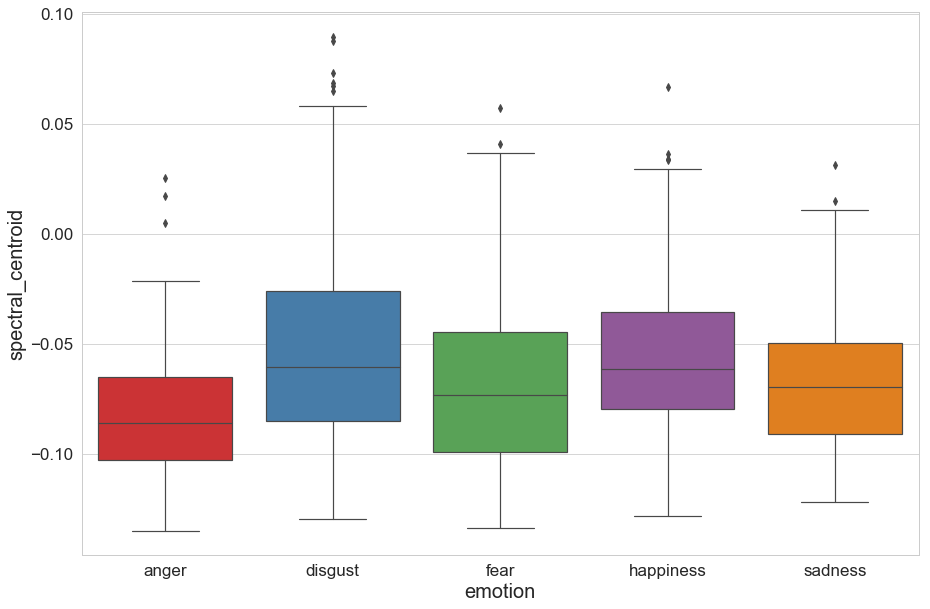

In [20]:
display_boxplot("spectral_centroid", df, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

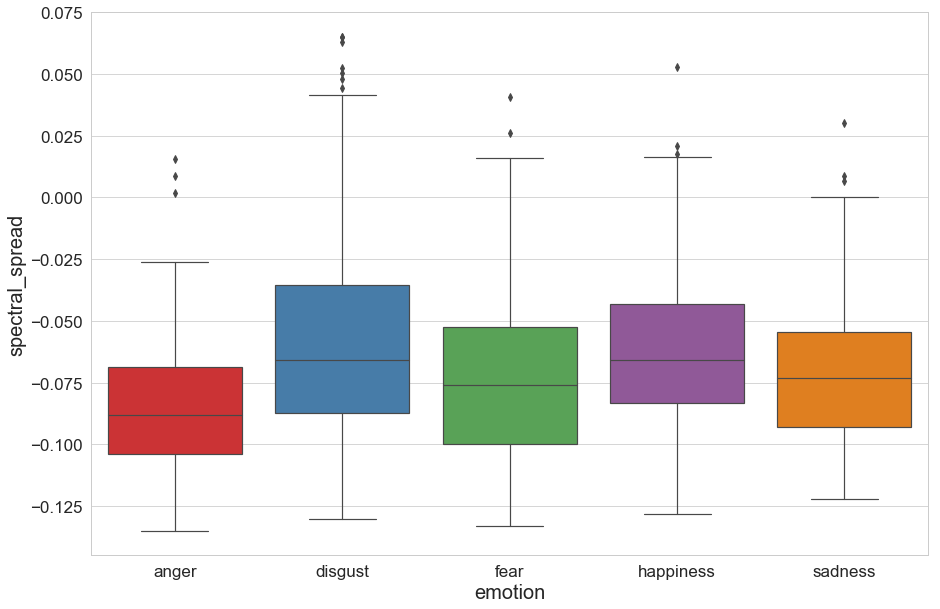

In [21]:
display_boxplot("spectral_spread", df, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

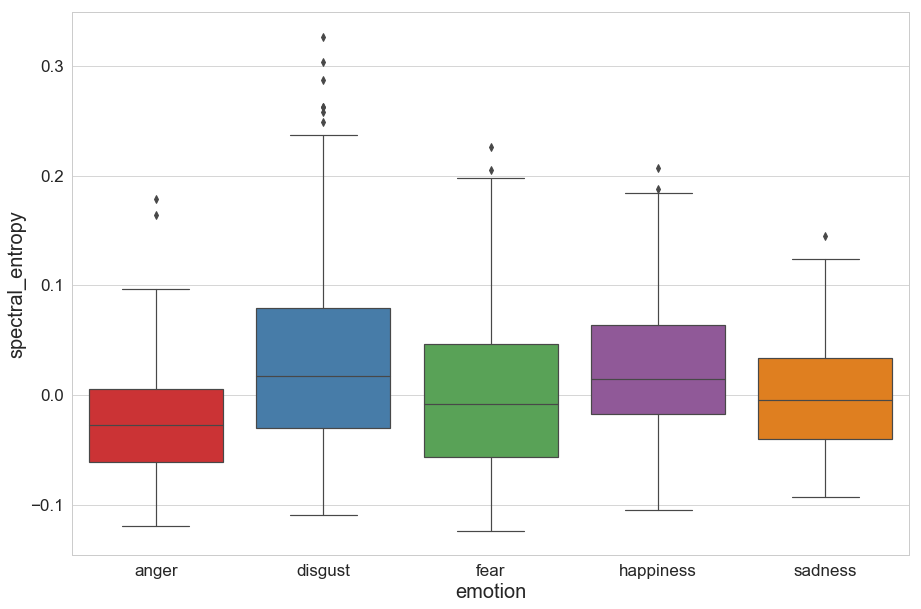

In [22]:
display_boxplot("spectral_entropy", df, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

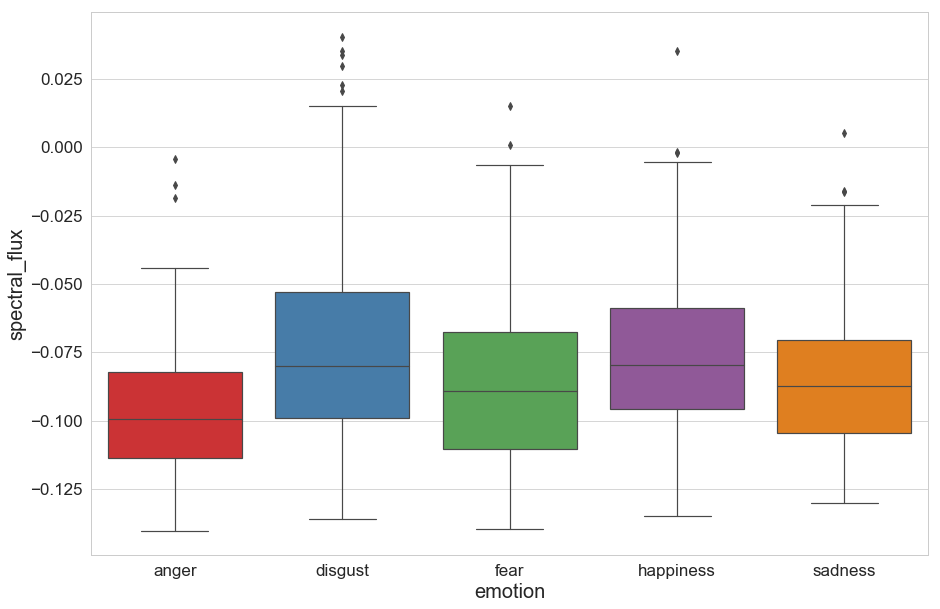

In [23]:
display_boxplot("spectral_flux", df, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

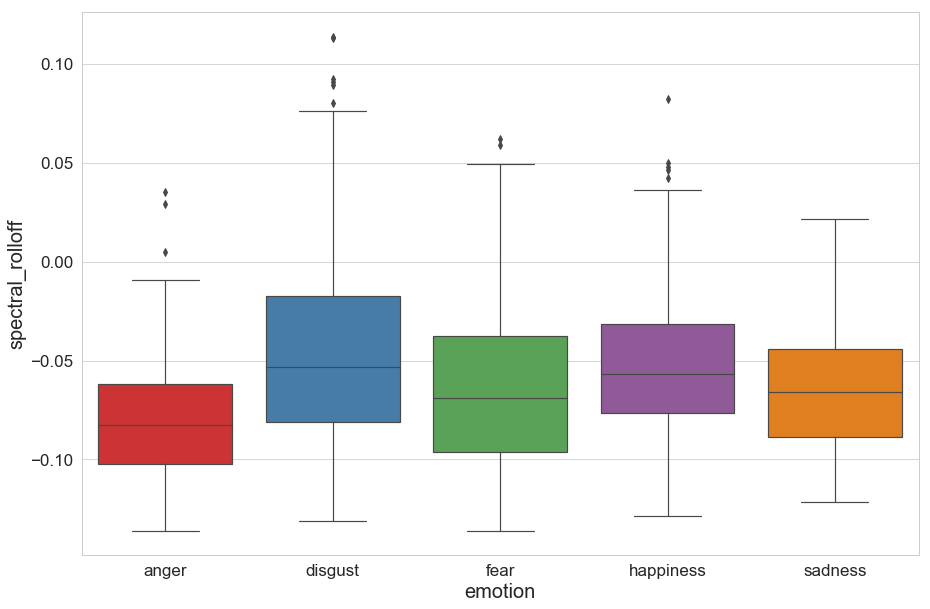

In [24]:
display_boxplot("spectral_rolloff", df, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

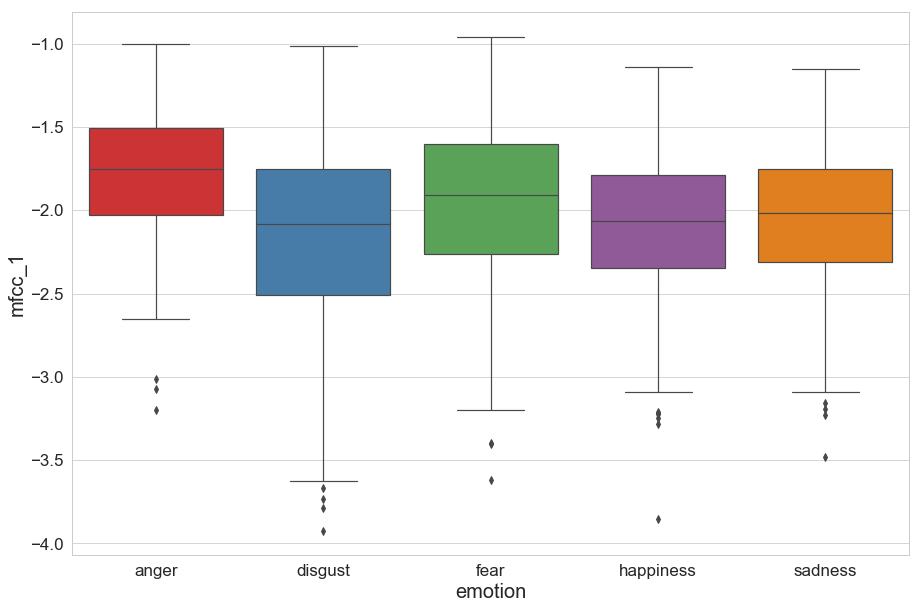

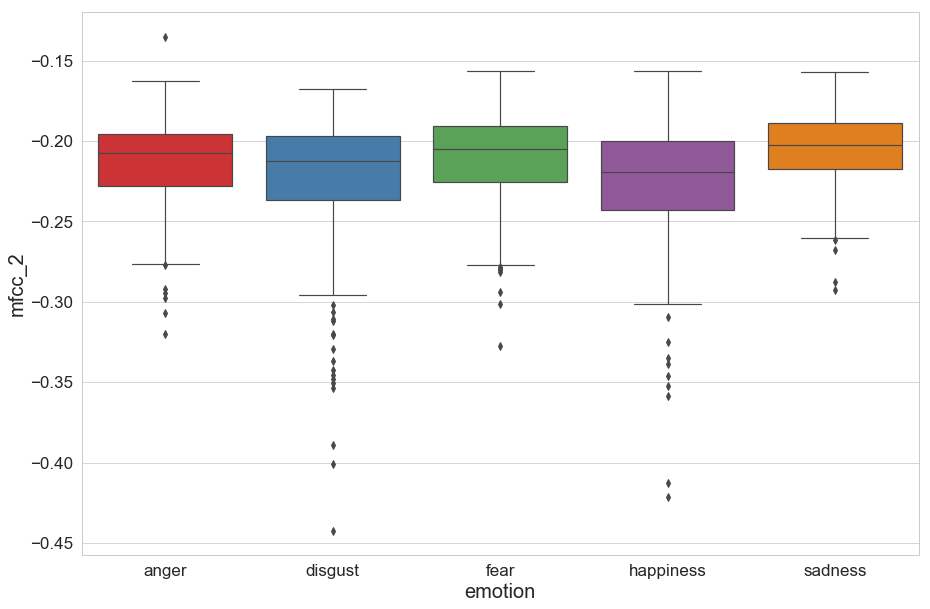

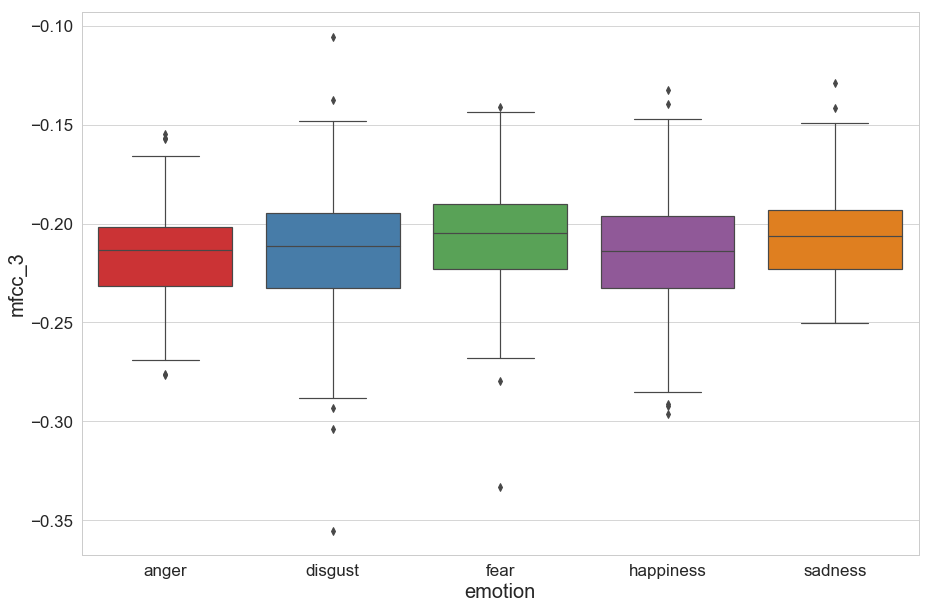

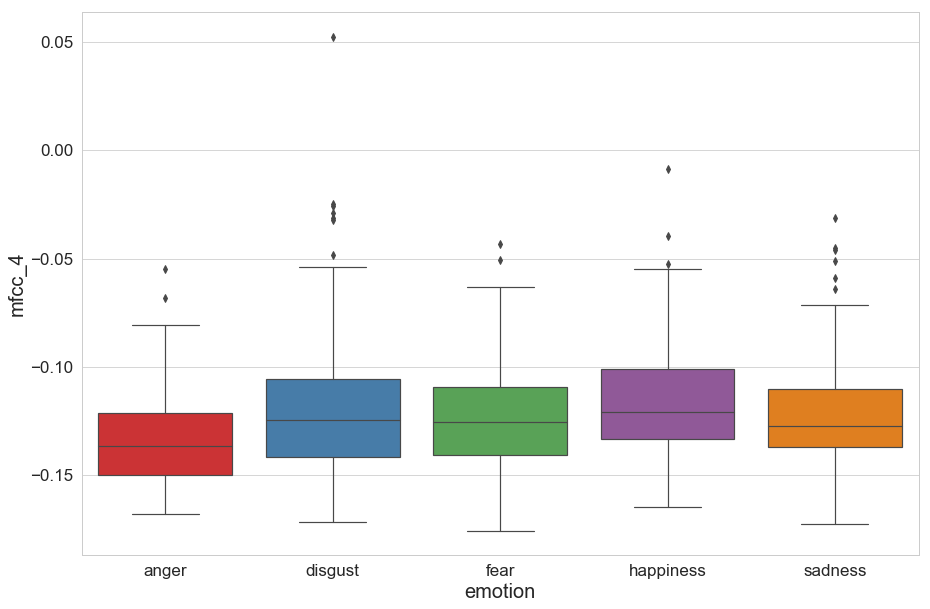

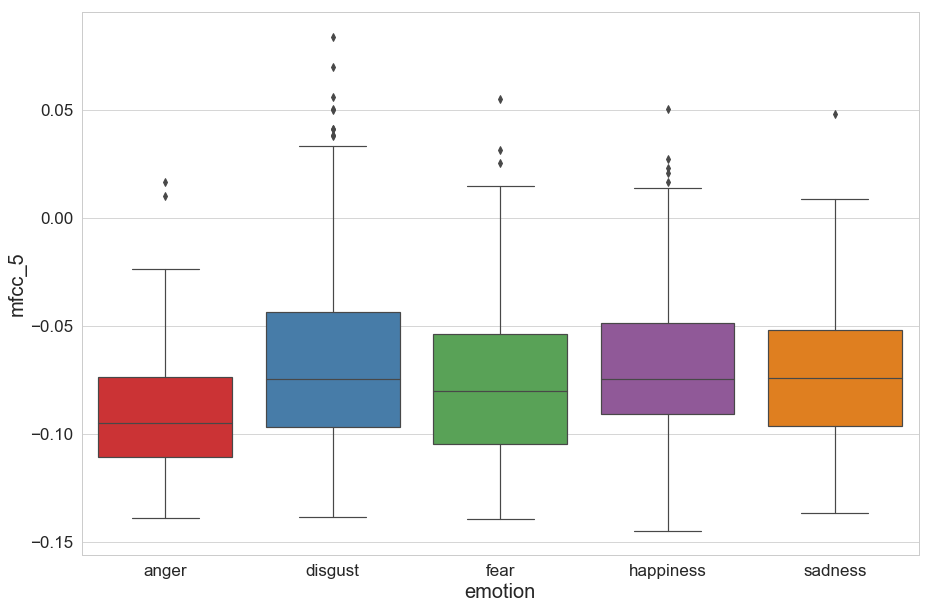

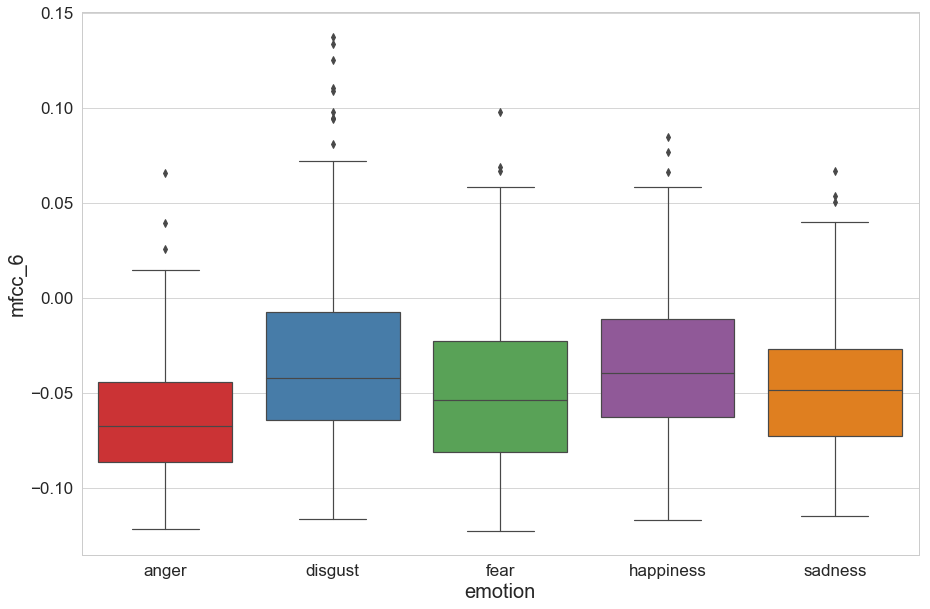

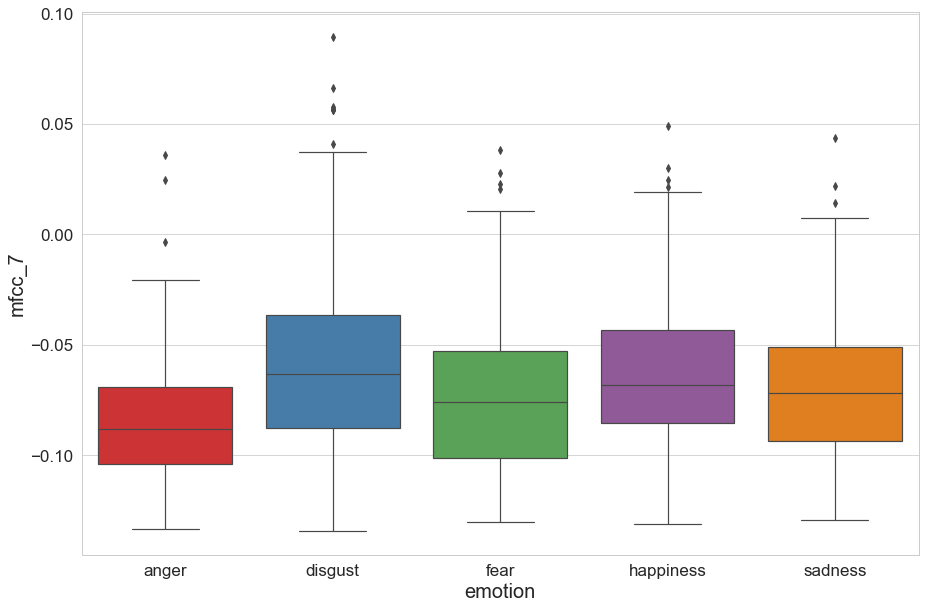

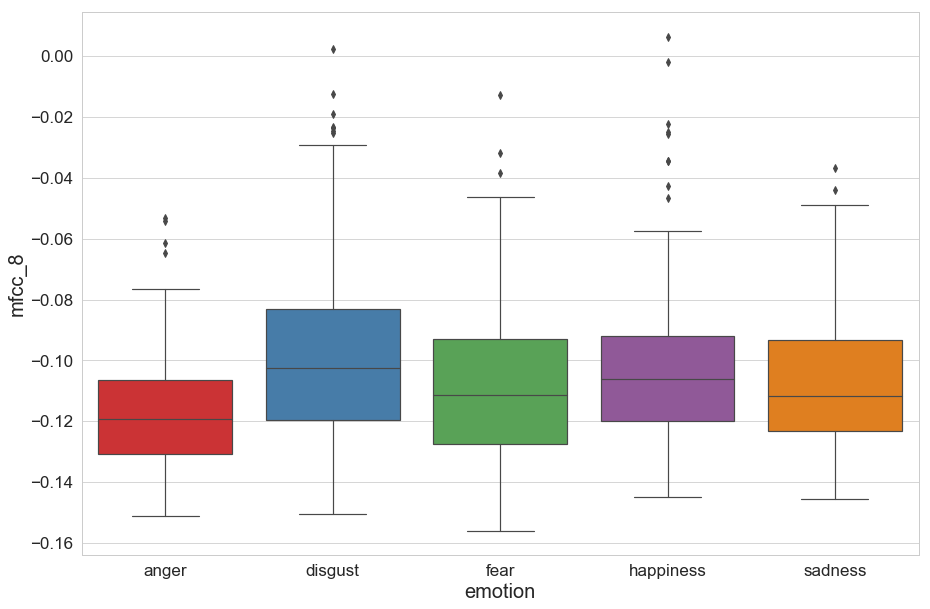

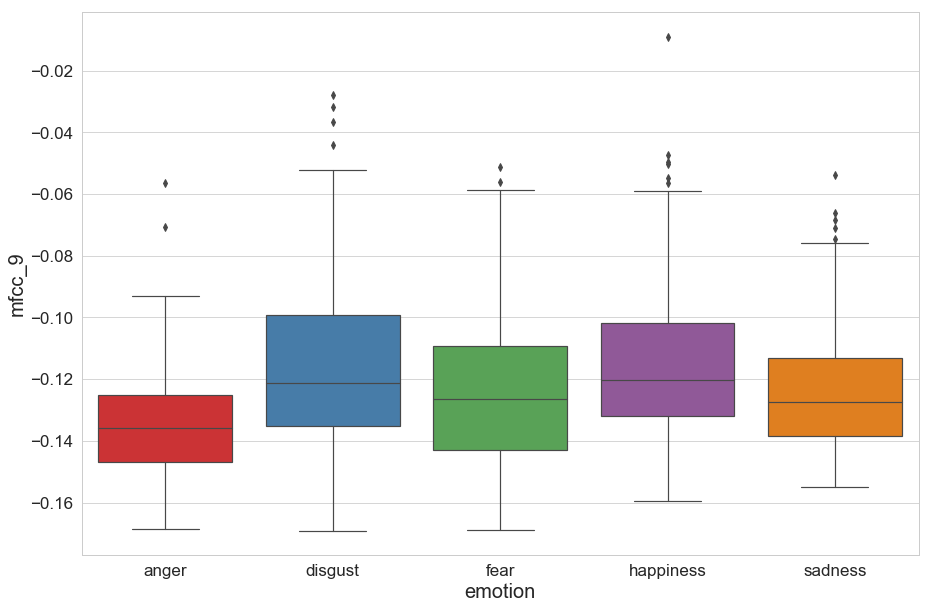

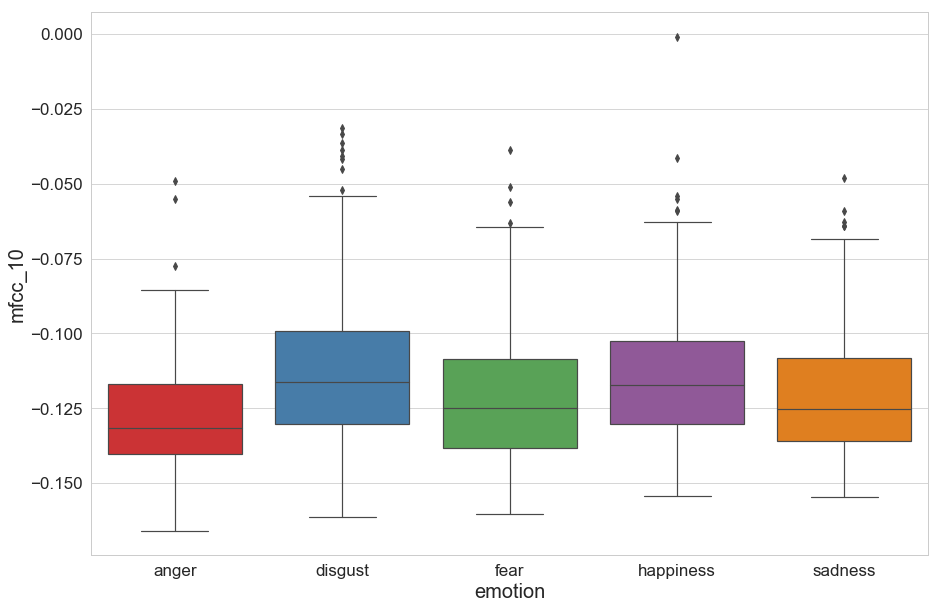

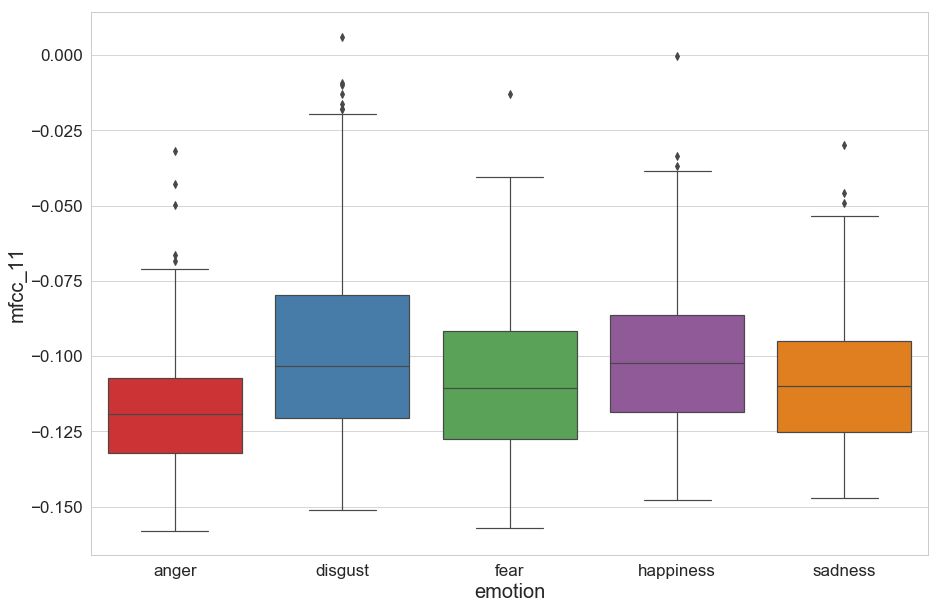

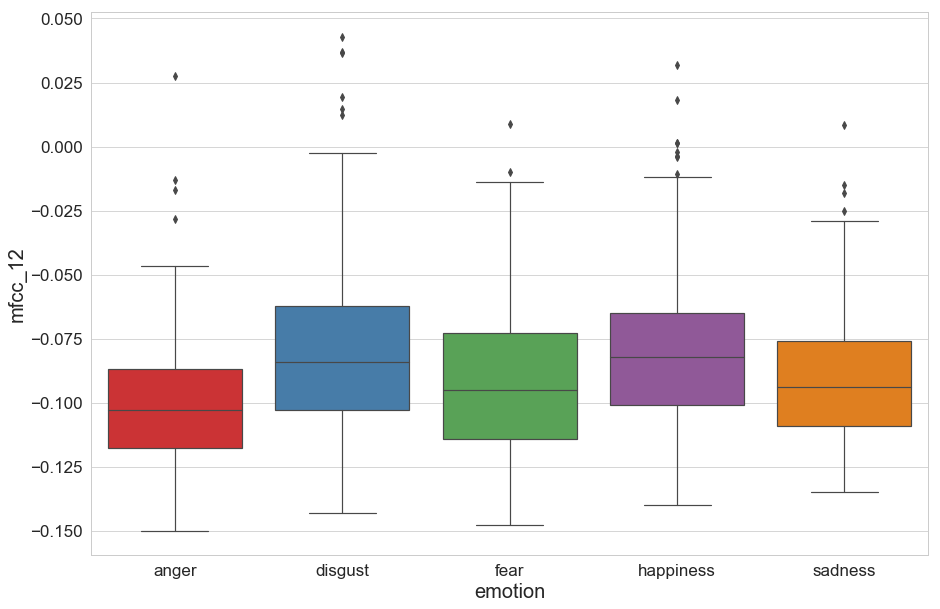

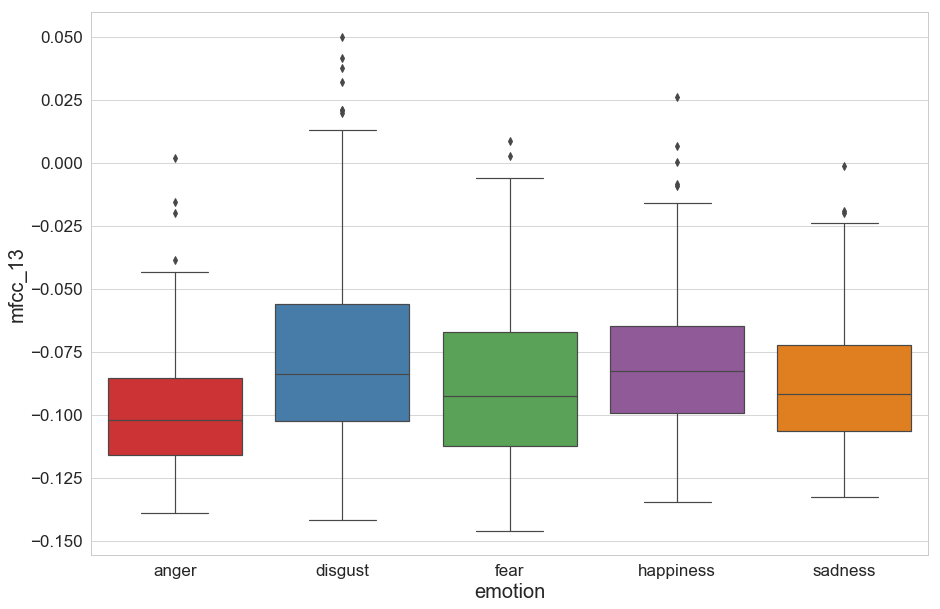

In [25]:
for mfcc in label_features[8:21]:
    display_boxplot(mfcc, df, df_emotions)

## Chroma Vector (chroma_< X >) - Chroma Deviation (chroma_std)

Una representación de 12 elementos de la energía espectral en la que los intervalos **representan las 12 clases de tonos de la música de tipo occidental** (espaciado de semitono).

La desviación estándar de los 12 coeficientes 

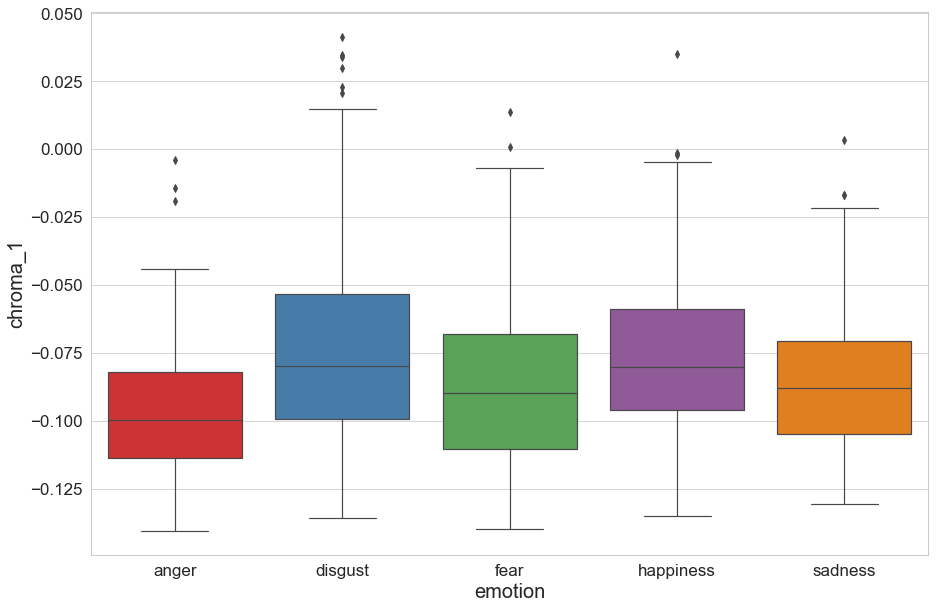

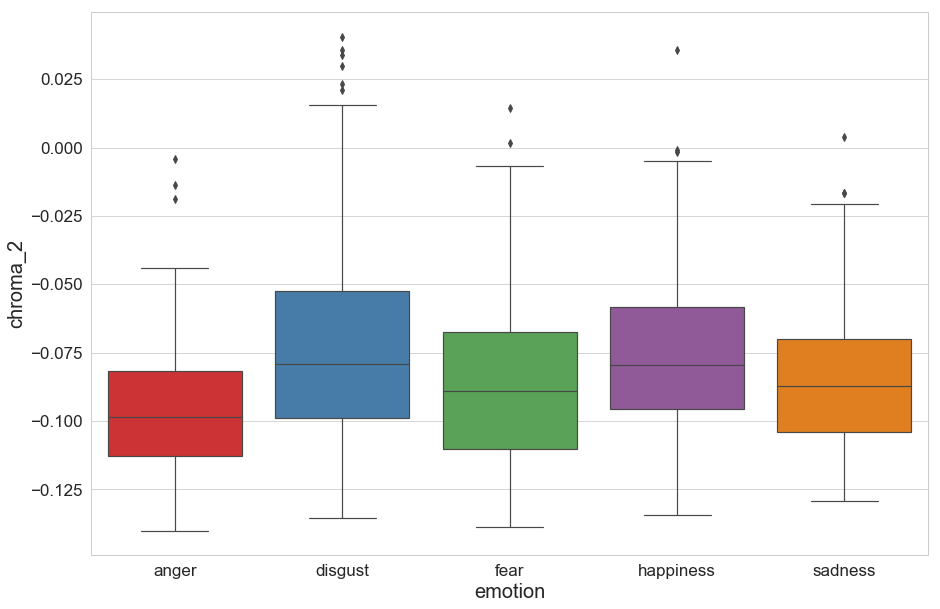

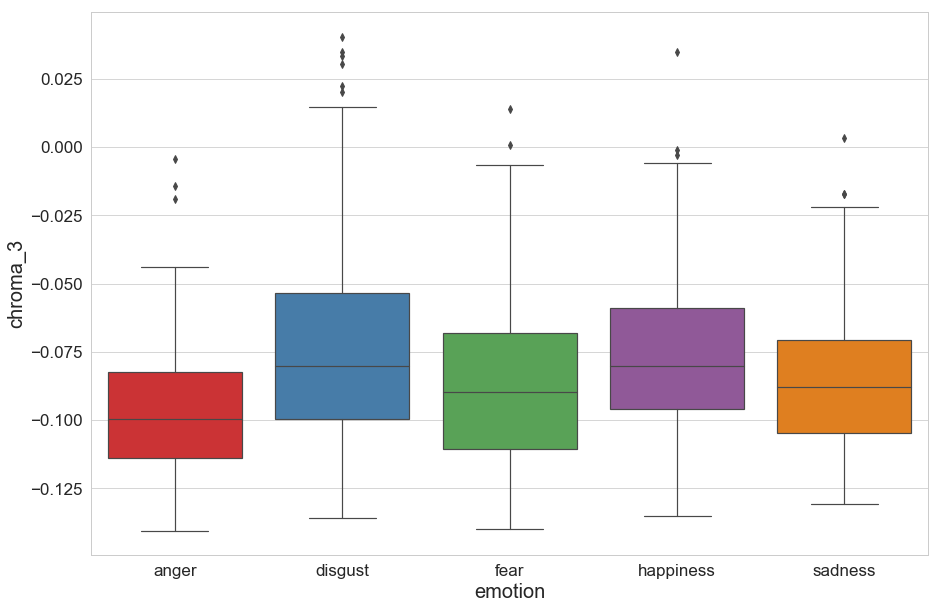

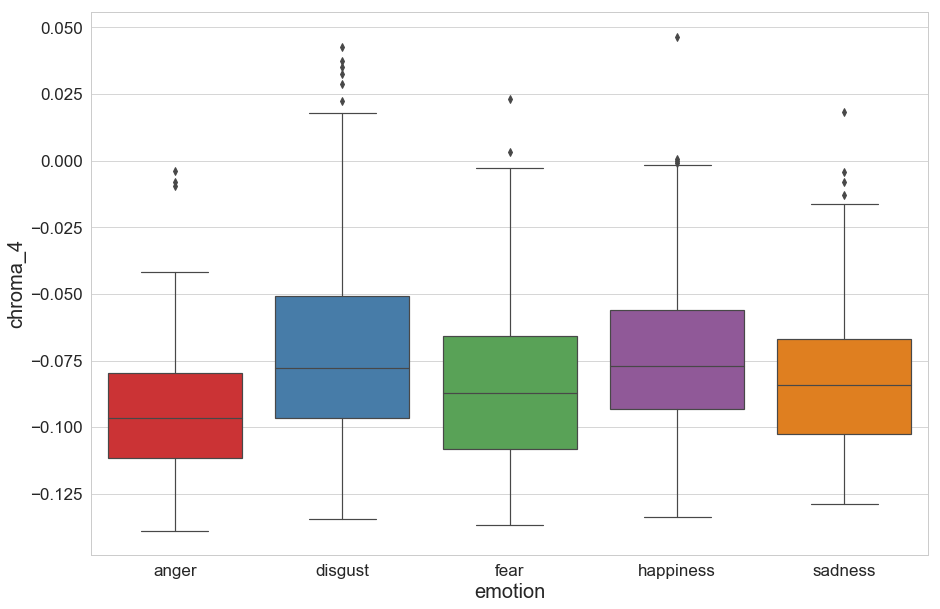

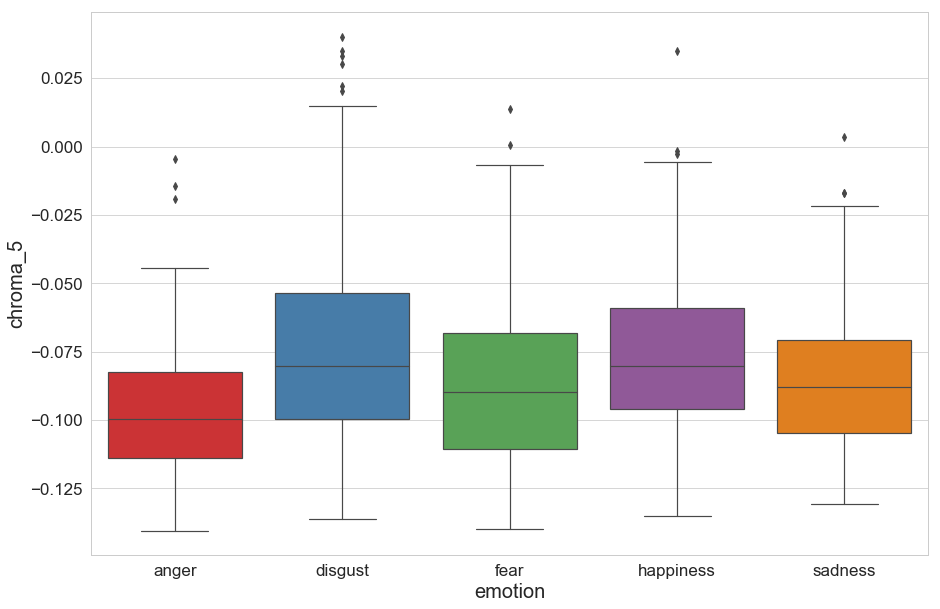

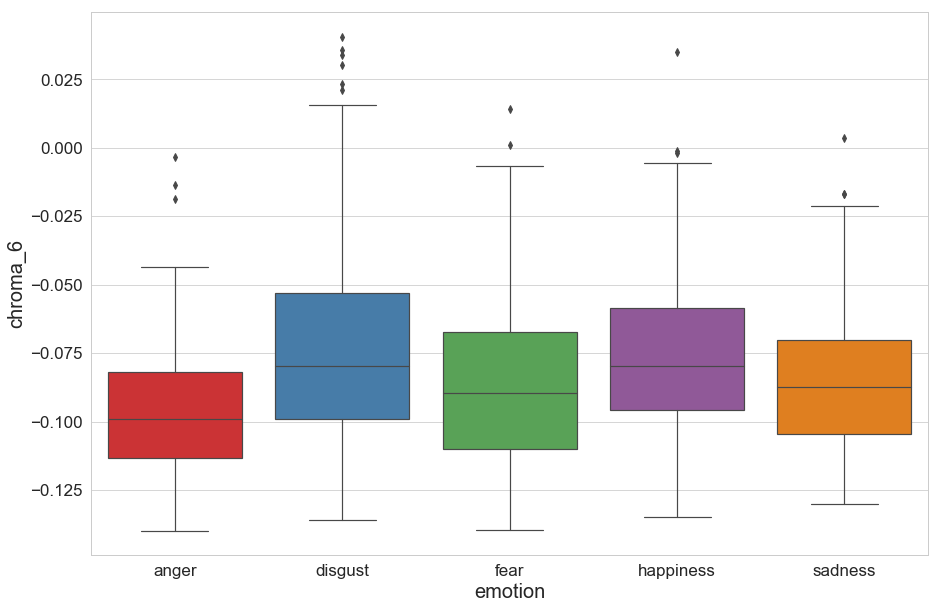

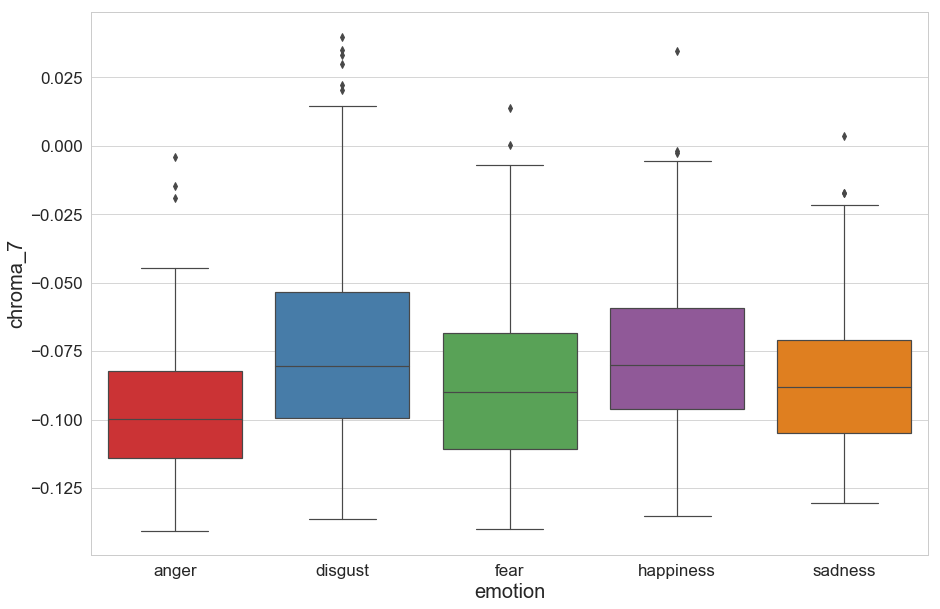

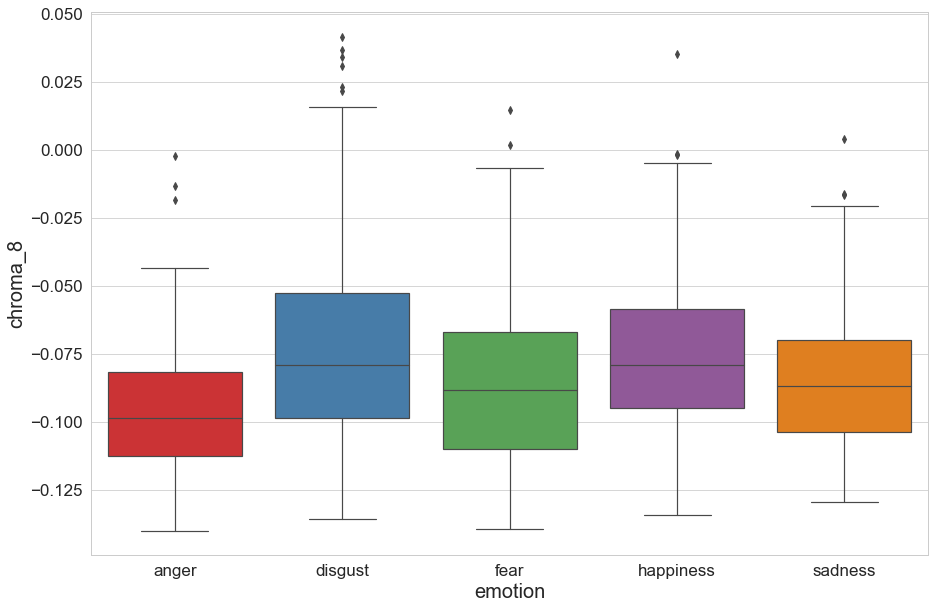

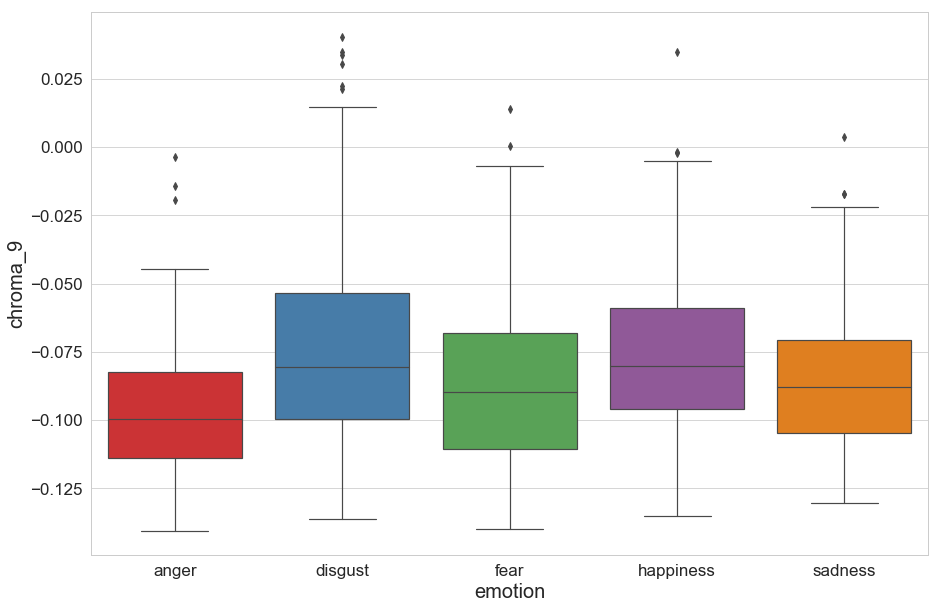

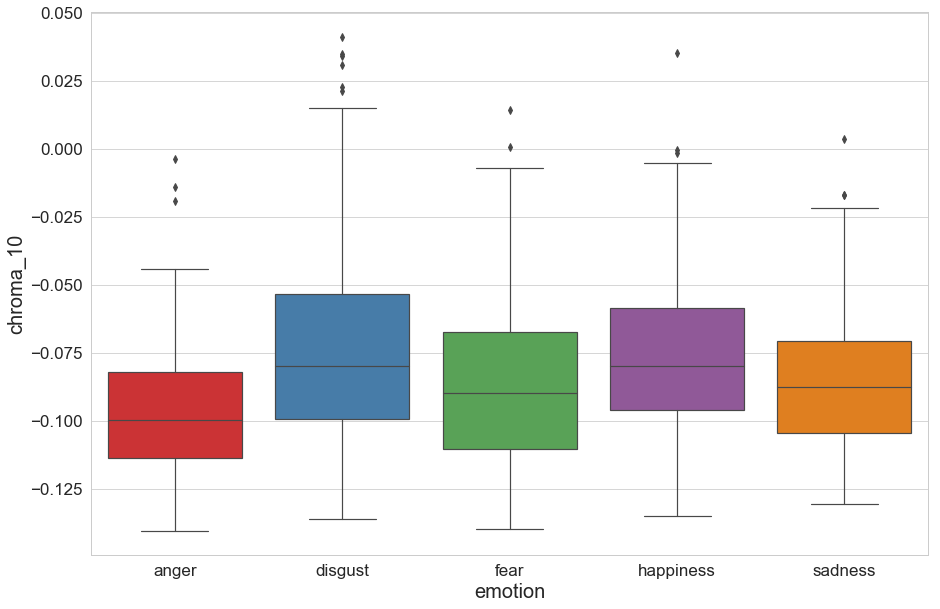

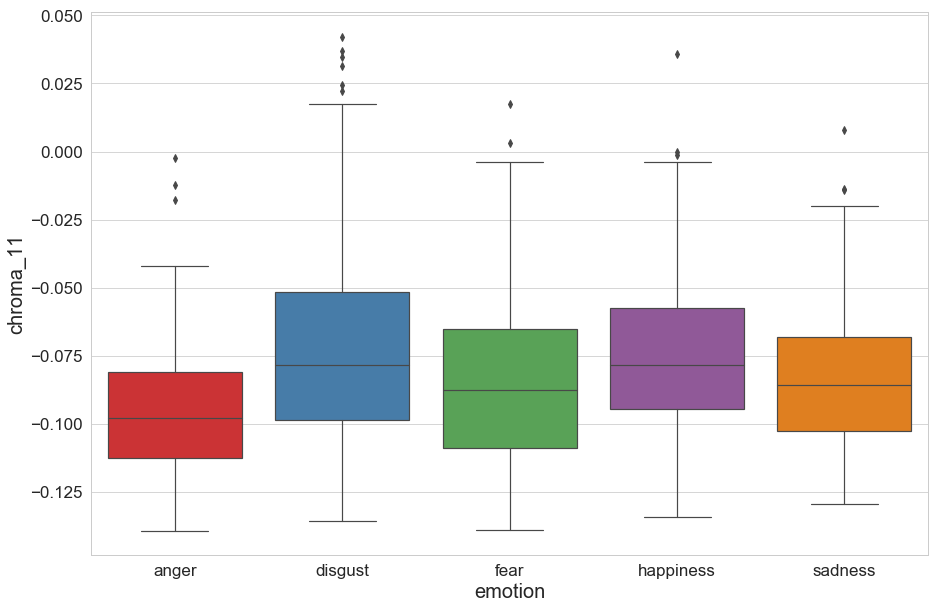

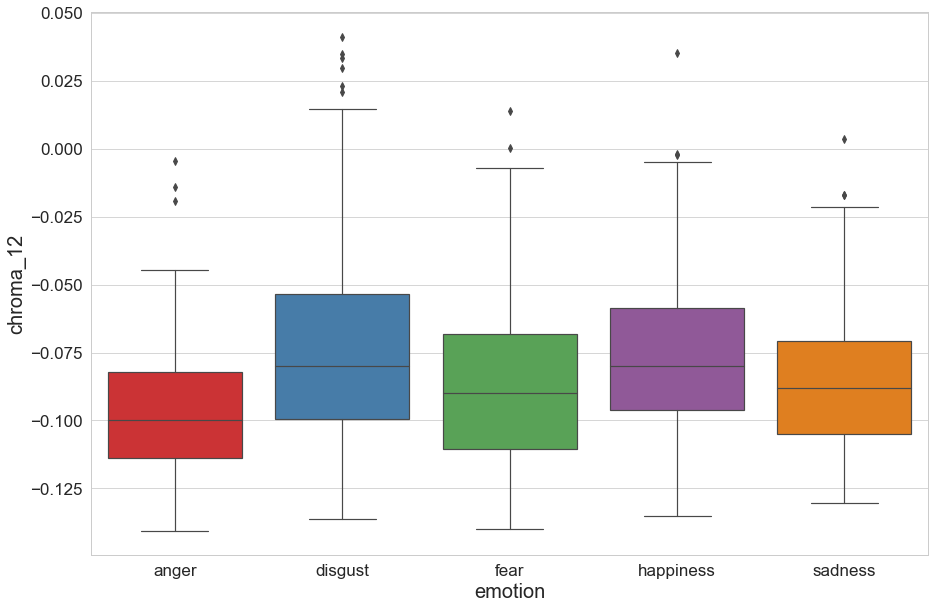

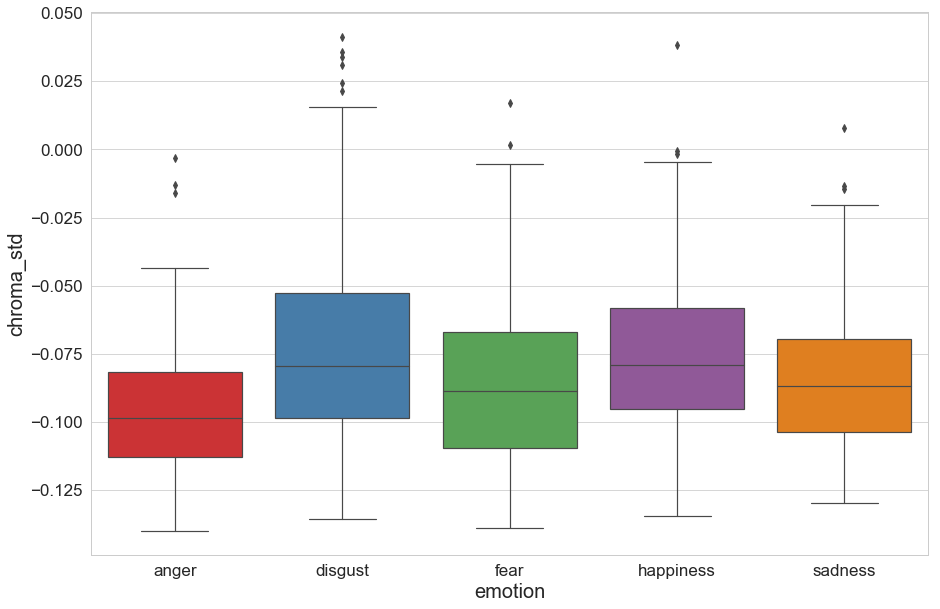

In [26]:
for chroma in label_features[21:34]:
    display_boxplot(chroma, df, df_emotions)